# <font color=blue>Advanced Regression Assignment: House Price Prediction</font>

In [1177]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# Import sci-kit learn libraries for Advanced Regression (Regularization) analysis using Cross-Validation 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the libraries for Linear Regression Model
##Statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE
from sklearn.feature_selection import RFE

In [1178]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

## <font color=blue>Part 1A : Data Analysis - Data Cleaning</font>

In [1179]:
# Read the data from the CSV file into a DataFrame
housing_df = pd.read_csv("train.csv")

In [1180]:
#Get the shape (row and column count of the data)
housing_df.shape

(1460, 81)

In [1181]:
#Get the columns wise info - Datatypes and missing values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1182]:
#Check the sample values using df.head()
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1183]:
#Check the sample values using df.tail()
housing_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [1184]:
#Get the distribution of Numerical values
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1185]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [1186]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

housing_null_rows=round(((housing_df.isna().sum(axis=1))/housing_df.shape[1]) * 100,2)
print(housing_null_rows[housing_null_rows > 30])

Series([], dtype: float64)


In [1187]:
# Check the unique counts for all columns across the data set
for x in housing_df.columns:
    print(x+':',len(housing_df[x].unique()))

Id: 1460
MSSubClass: 15
MSZoning: 5
LotFrontage: 111
LotArea: 1073
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
MasVnrArea: 328
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinSF1: 637
BsmtFinType2: 7
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
KitchenQual: 4
TotRmsAbvGrd: 12
Functional: 7
Fireplaces: 4
FireplaceQu: 6
GarageType: 7
GarageYrBlt: 98
GarageFinish: 4
GarageCars: 5
GarageArea: 441
GarageQual: 6
GarageCond: 6
PavedDrive: 3
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPo

In [1188]:
# Drop the Alley, PoolQC, MiscFeature,Fence as all these 4 columns have very high percentage of NULL values
# Drop the columns with 50% or higher NULL values
housing_df.dropna(axis=1,thresh=len(housing_df.index)/2,inplace=True)

In [1189]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


In [1190]:
# Check the shape of DF after dropping columns
housing_df.shape

(1460, 77)

In [1191]:
# Check the values in FireplaceQu columns - Need to treat this column for NULL values
print(housing_df.FireplaceQu.value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [1192]:
# Check the count of NULL values
housing_df.loc[housing_df['FireplaceQu'].isnull() == True ].Fireplaces.value_counts()

0    690
Name: Fireplaces, dtype: int64

In [1193]:
# It is better to replace the values with NA rather than impputing to create bias
housing_df['FireplaceQu'].replace(np.NaN,'NA',inplace=True)

In [1194]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


In [1195]:
# Get the description of LotFrontage
print(housing_df.LotFrontage.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [1196]:
# See the numerical description of SalePrice when LotFrontage is NOT-NULL
housing_df.loc[housing_df['LotFrontage'].isnull() == False ].SalePrice.describe()

count      1201.000000
mean     180770.480433
std       83389.519866
min       34900.000000
25%      127500.000000
50%      159500.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1197]:
# See the numerical description of SalePrice when LotFrontage is NULL
housing_df.loc[housing_df['LotFrontage'].isnull() == True ].SalePrice.describe()

count       259.000000
mean     181620.073359
std       57841.775706
min       61000.000000
25%      143375.000000
50%      172400.000000
75%      215000.000000
max      466500.000000
Name: SalePrice, dtype: float64

In [1198]:
# See the distribution of LotConfig when LotFrontage is NOT-NULL
housing_df.loc[housing_df['LotFrontage'].isnull() == False ].LotConfig.value_counts()

Inside     918
Corner     201
CulDSac     45
FR2         33
FR3          4
Name: LotConfig, dtype: int64

In [1199]:
# See the distribution of LotConfig when LotFrontage is NULL
housing_df.loc[housing_df['LotFrontage'].isnull() == True ].LotConfig.value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

Text(0, 0.5, 'No. of records')

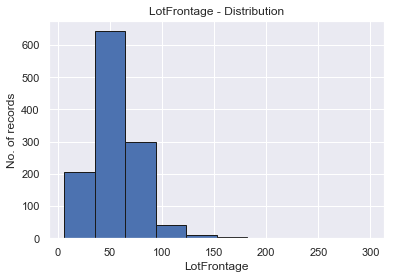

In [1200]:
# See the distribution of LotFrontage
counts, bins, bars = plt.hist(housing_df['LotFrontage'],bins=10,edgecolor = 'k',align='left')
plt.title('LotFrontage'+' - Distribution')
plt.xlabel('LotFrontage')
plt.ylabel('No. of records')

In [1201]:
# Get the bin counts and values
print(list(counts),list(bins))

[205.0, 643.0, 298.0, 40.0, 9.0, 4.0, 0.0, 0.0, 0.0, 2.0] [21.0, 50.2, 79.4, 108.6, 137.8, 167.0, 196.2, 225.4, 254.6, 283.8, 313.0]


In [1202]:
a=list(counts)
b=list(bins)

for i,count in enumerate(a):
    j=0
    print(i,count)
    

0 205.0
1 643.0
2 298.0
3 40.0
4 9.0
5 4.0
6 0.0
7 0.0
8 0.0
9 2.0


In [1203]:
# Assign the values to LotFrontage NULLs mantaining the same distribution
x_df=pd.DataFrame(a[:6],b[:6])
x_df.reset_index(inplace=True)
x_df.columns=['LotFrontage','count']
x_df
sums=x_df['count'].sum()
null_len=len(housing_df.loc[housing_df['LotFrontage'].isnull() == True])
i=0
j=0
for p,row in housing_df.loc[housing_df['LotFrontage'].isnull() == True].iterrows():
    housing_df.at[p,'LotFrontage']=x_df['LotFrontage'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

Text(0, 0.5, 'No. of records')

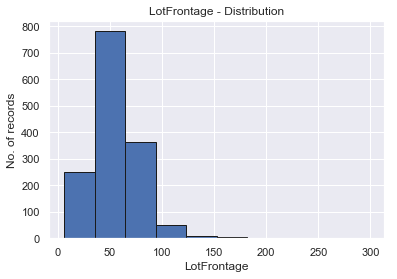

In [1204]:
# Get the distribution after imputation
counts, bins, bars = plt.hist(housing_df['LotFrontage'],bins=10,edgecolor = 'k',align='left')
plt.title('LotFrontage'+' - Distribution')
plt.xlabel('LotFrontage')
plt.ylabel('No. of records')

In [1205]:
# Describe and check the data
print(housing_df.LotFrontage.describe())

count    1460.000000
mean       67.348630
std        24.611122
min        21.000000
25%        50.200000
50%        66.000000
75%        79.400000
max       313.000000
Name: LotFrontage, dtype: float64


In [1206]:
# Check the GarageType field
housing_df.loc[housing_df['GarageType'].isnull() == True].shape

(81, 77)

In [1207]:
# Check GarageArea
housing_df.loc[housing_df['GarageArea']  == 0].shape

(81, 77)

In [1208]:
# Check GarageCars
housing_df.loc[housing_df['GarageCars']  == 0].shape

(81, 77)

In [1209]:
# Check GarageFinish
housing_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1210]:
# Check GarageQuality
housing_df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1211]:
# Check GarageCondition
housing_df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1212]:
#Impute with NA as the Garage is NOT AVAILABLE for these entries (houses)
housing_df['GarageFinish'].replace(np.NaN,'NA',inplace=True)
housing_df['GarageQual'].replace(np.NaN,'NA',inplace=True)
housing_df['GarageCond'].replace(np.NaN,'NA',inplace=True)
housing_df['GarageType'].replace(np.NaN,'NA',inplace=True)

In [1213]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageYrBlt     5.55
dtype: float64


In [1214]:
# Check Basement values
housing_df.loc[housing_df['TotalBsmtSF']  == 0].shape

(37, 77)

In [1215]:
# Check Basement values
housing_df.loc[housing_df['BsmtQual'].isnull()  == True].shape

(37, 77)

In [1216]:
#Impute with NA as the Basement is NOT AVAILABLE for these entries (houses)
housing_df['BsmtQual'].replace(np.NaN,'NA',inplace=True)
housing_df['BsmtCond'].replace(np.NaN,'NA',inplace=True)
housing_df['BsmtFinType1'].replace(np.NaN,'NA',inplace=True)

In [1217]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

MasVnrType      0.55
MasVnrArea      0.55
BsmtExposure    2.60
BsmtFinType2    2.60
Electrical      0.07
GarageYrBlt     5.55
dtype: float64


In [1218]:
#Check BasementExposure
housing_df.loc[housing_df['BsmtExposure'].isnull()  == True].TotalBsmtSF.value_counts()

0      37
936     1
Name: TotalBsmtSF, dtype: int64

In [1219]:
#Check BasementFinishType2
housing_df.loc[housing_df['BsmtFinType2'].isnull()  == True].TotalBsmtSF.value_counts()

0       37
3206     1
Name: TotalBsmtSF, dtype: int64

In [1220]:
# Replace with NA for missing values
housing_df['BsmtExposure'].replace(np.NaN,'NA',inplace=True)
housing_df['BsmtFinType2'].replace(np.NaN,'NA',inplace=True)

In [1221]:
# Replace with No for 1 missing values where Basement is present
print(housing_df.loc[housing_df['BsmtExposure']  == 'NA'].BsmtFinSF1.value_counts())
print(housing_df.loc[housing_df['BsmtExposure']  == 'NA'].BsmtFinSF2.value_counts())
print(housing_df.loc[housing_df['BsmtExposure']  == 'NA'].TotalBsmtSF.value_counts())
print(housing_df['BsmtExposure'].value_counts())
housing_df.loc[(housing_df['BsmtExposure']  == 'NA') & (housing_df['TotalBsmtSF'] == 936),'BsmtExposure']='No'
print(housing_df['BsmtExposure'].value_counts())

0    38
Name: BsmtFinSF1, dtype: int64
0    38
Name: BsmtFinSF2, dtype: int64
0      37
936     1
Name: TotalBsmtSF, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
No    954
Av    221
Gd    134
Mn    114
NA     37
Name: BsmtExposure, dtype: int64


In [1222]:
# Replace with MODE for 1 missing values where Basement is present
print(housing_df.loc[housing_df['BsmtFinType2']  == 'NA'].BsmtFinSF1.value_counts())
print(housing_df.loc[housing_df['BsmtFinType2']  == 'NA'].BsmtFinSF2.value_counts())
print(housing_df.loc[housing_df['BsmtFinType2']  == 'NA'].TotalBsmtSF.value_counts())
print(housing_df['BsmtFinType2'].value_counts())
housing_df.loc[(housing_df['BsmtFinType2'] == 'NA') & (housing_df['TotalBsmtSF'] == 3206),'BsmtFinType2']=housing_df['BsmtFinType2'].mode()[0]
print(housing_df['BsmtFinType2'].value_counts())

0       37
1124     1
Name: BsmtFinSF1, dtype: int64
0      37
479     1
Name: BsmtFinSF2, dtype: int64
0       37
3206     1
Name: TotalBsmtSF, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    1257
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [1223]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

MasVnrType     0.55
MasVnrArea     0.55
Electrical     0.07
GarageYrBlt    5.55
dtype: float64


In [1224]:
#Check the column distribution
print(housing_df['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [1225]:
#Check the column distribution
housing_df.loc[housing_df['MasVnrType'] == 'None'].MasVnrArea.value_counts()

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [1226]:
#Replace with None and 0.0
housing_df['MasVnrType'].replace(np.NaN,'None',inplace=True)
housing_df['MasVnrArea'].replace(np.NaN,0.0,inplace=True)

In [1227]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

Electrical     0.07
GarageYrBlt    5.55
dtype: float64


In [1228]:
housing_df.loc[housing_df['Electrical'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [1229]:
housing_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1230]:
# Replace with MODE for 1 missing value
housing_df.loc[housing_df['Electrical'].isnull() == True,'Electrical']=housing_df['Electrical'].mode()[0]

In [1231]:
housing_df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1232]:
# Check the column wise null percentages.

housing_null_fields=round((housing_df.isna().sum())/len(housing_df.index) * 100,2)
print(housing_null_fields[housing_null_fields > 0])

GarageYrBlt    5.55
dtype: float64


In [1233]:
# Get the DATE fields
print(housing_df['MoSold'].value_counts())
print(housing_df['YrSold'].value_counts())

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


In [1234]:
# Create GarageAge by deriving from YearSold and GarageYearBuilt
housing_df['GrgeAgeAtSale'] = [(n['YrSold']-n['GarageYrBlt']) for m,n in housing_df[['YrSold','GarageYrBlt']].iterrows()]

In [1235]:
#Replace Null with ZERO
housing_df['GrgeAgeAtSale'].replace(np.NaN,0,inplace=True)

In [1236]:
#Compute derived values AgeatSale and RemodAgeAtSale
housing_df['AgeAtSale']=[(n['YrSold']-n['YearBuilt']) for m,n in housing_df[['YrSold','YearBuilt']].iterrows()]
housing_df['RemodAgeAtSale']=[(n['YrSold']-n['YearRemodAdd']) for m,n in housing_df[['YrSold','YearRemodAdd']].iterrows()]

In [1237]:
# removing the column GarageYrBlt,YearBuilt,YrSold,YearRemodAdd as we have derived columns
housing_df.drop(['GarageYrBlt','YearBuilt','YrSold','YearRemodAdd'], axis=1,inplace=True)

In [1238]:
# Get the data info of MSSubClass
print(housing_df['MSSubClass'].value_counts())
housing_df['MSSubClass'].describe()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [1239]:
# Prefix 'Type' as the column is NOT ordinal value, but only Categorical
housing_df['MSSubClassType']=['Type'+str(x) for x in housing_df['MSSubClass']]

In [1240]:
# Get counts of MSSubClassType
print(housing_df['MSSubClassType'].value_counts())

Type20     536
Type60     299
Type50     144
Type120     87
Type30      69
Type160     63
Type70      60
Type80      58
Type90      52
Type190     30
Type85      20
Type75      16
Type45      12
Type180     10
Type40       4
Name: MSSubClassType, dtype: int64


In [1241]:
# Check Dataframe Info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id                1460 non-null int64
MSSubClass        1460 non-null int64
MSZoning          1460 non-null object
LotFrontage       1460 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null object
LotShape          1460 non-null object
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null object
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exterior2nd       1460 non-null object
MasVnrType        1460 non-null object


In [1242]:
# removing the column MSSubClass as we have MSSubClassType
housing_df.drop('MSSubClass', axis=1,inplace=True)

## <font color=blue>Part 1B : Data Analysis - Creating Ordinal Variables</font>

In [1243]:
#Create Mapping for Ordinal fields
gen_ord_map = {'NA':0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

#Get the Ordinal variable created
housing_df['HeatingQC_Ord'] = housing_df['HeatingQC'].map(gen_ord_map)

In [1244]:
#Get the Heating variables counts
print(housing_df['HeatingQC'].value_counts())
print(housing_df['HeatingQC_Ord'].value_counts())

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
5    741
3    428
4    241
2     49
1      1
Name: HeatingQC_Ord, dtype: int64


In [1245]:
# removing the column HeatingQC; HeatingQC_Ord can be used
housing_df.drop('HeatingQC', axis=1,inplace=True)

In [1246]:
#Get the Kitchen Quality counts
print(housing_df['KitchenQual'].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


In [1247]:
#Get the Ordinal variable created
housing_df['KitchenQual_Ord'] = housing_df['KitchenQual'].map(gen_ord_map)

In [1248]:
#Check the counts
print(housing_df['KitchenQual_Ord'].value_counts())

3    735
4    586
5    100
2     39
Name: KitchenQual_Ord, dtype: int64


In [1249]:
# removing the column KitchenQual; KitchenQual_Ord can be used
housing_df.drop('KitchenQual', axis=1,inplace=True)

In [1250]:
#Check FireplaceQu
print(housing_df['FireplaceQu'].value_counts())

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [1251]:
#Create the Ordinal variable
housing_df['FireplaceQu_Ord'] = housing_df['FireplaceQu'].map(gen_ord_map)

In [1252]:
# CHeck the Ordinal value counts
print(housing_df['FireplaceQu_Ord'].value_counts())

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu_Ord, dtype: int64


In [1253]:
#Drop the FireplaceQu as we have got ordinal value
housing_df.drop(['FireplaceQu'], axis=1,inplace=True)

In [1254]:
# Check and create External Quality/Condition ordinal variables
print(housing_df['ExterQual'].value_counts())
print(housing_df['ExterCond'].value_counts())
housing_df['ExterQual_Ord'] = housing_df['ExterQual'].map(gen_ord_map)
housing_df['ExterCond_Ord'] = housing_df['ExterCond'].map(gen_ord_map)
print(housing_df['ExterQual_Ord'].value_counts())
print(housing_df['ExterCond_Ord'].value_counts())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
3    906
4    488
5     52
2     14
Name: ExterQual_Ord, dtype: int64
3    1282
4     146
2      28
5       3
1       1
Name: ExterCond_Ord, dtype: int64


In [1255]:
# removing the column External quality & condition; 
housing_df.drop(['ExterQual','ExterCond'], axis=1,inplace=True)

In [1256]:
# Check and create Basement Quality/Condition ordinal variables
print(housing_df['BsmtQual'].value_counts())
print(housing_df['BsmtCond'].value_counts())

housing_df['BsmtQual_Ord'] = housing_df['BsmtQual'].map(gen_ord_map)
housing_df['BsmtCond_Ord'] = housing_df['BsmtCond'].map(gen_ord_map)
print(housing_df['BsmtQual_Ord'].value_counts())
print(housing_df['BsmtCond_Ord'].value_counts())


TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
3    649
4    618
5    121
0     37
2     35
Name: BsmtQual_Ord, dtype: int64
3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond_Ord, dtype: int64


In [1257]:
#Basement exposure
exp_ord_map = {'NA':0,'No':1,'Mn': 2, 'Av': 3, 'Gd': 4}

print(housing_df['BsmtExposure'].value_counts())
housing_df['BsmtExposure_Ord'] = housing_df['BsmtExposure'].map(exp_ord_map)
print(housing_df['BsmtExposure_Ord'].value_counts())

No    954
Av    221
Gd    134
Mn    114
NA     37
Name: BsmtExposure, dtype: int64
1    954
3    221
4    134
2    114
0     37
Name: BsmtExposure_Ord, dtype: int64


In [1258]:
# removing the column Basement quality, condition & Exposure; 
housing_df.drop(['BsmtQual','BsmtCond','BsmtExposure'], axis=1,inplace=True)

In [1259]:
#Basement Finish type variables
bsmt_ord_map = {'NA':0,'Unf':1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

print(housing_df['BsmtFinType1'].value_counts())
print(housing_df['BsmtFinType2'].value_counts())

housing_df['BsmtFinType1_Ord'] = housing_df['BsmtFinType1'].map(bsmt_ord_map)
housing_df['BsmtFinType2_Ord'] = housing_df['BsmtFinType2'].map(bsmt_ord_map)

print(housing_df['BsmtFinType1_Ord'].value_counts())
print(housing_df['BsmtFinType2_Ord'].value_counts())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1257
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1_Ord, dtype: int64
1    1257
3      54
2      46
0      37
4      33
5      19
6      14
Name: BsmtFinType2_Ord, dtype: int64


In [1260]:
# removing the column Basement Fintype1 & Fintype2; 
housing_df.drop(['BsmtFinType1','BsmtFinType2'], axis=1,inplace=True)

In [1261]:
#Check the data
housing_df.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,GrgeAgeAtSale,AgeAtSale,RemodAgeAtSale,MSSubClassType,HeatingQC_Ord,KitchenQual_Ord,FireplaceQu_Ord,ExterQual_Ord,ExterCond_Ord,BsmtQual_Ord,BsmtCond_Ord,BsmtExposure_Ord,BsmtFinType1_Ord,BsmtFinType2_Ord
0,1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,0,150,856,GasA,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5.0,5,5,Type60,5,4,0,4,3,4,3,1,6,1
1,2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,0,284,1262,GasA,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31.0,31,31,Type20,5,3,3,3,3,4,3,4,5,1
2,3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,0,434,920,GasA,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,7.0,7,6,Type60,5,4,3,4,3,4,3,2,6,1
3,4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,0,540,756,GasA,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,8.0,91,36,Type70,4,4,4,3,3,3,4,1,5,1
4,5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,0,490,1145,GasA,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8.0,8,8,Type60,5,4,3,4,3,4,3,3,6,1


In [1262]:
#Garage Variables
print(housing_df['GarageQual'].value_counts())
print(housing_df['GarageCond'].value_counts())

housing_df['GarageQual_Ord'] = housing_df['GarageQual'].map(gen_ord_map)
housing_df['GarageCond_Ord'] = housing_df['GarageCond'].map(gen_ord_map)

print(housing_df['GarageQual_Ord'].value_counts())
print(housing_df['GarageCond_Ord'].value_counts())

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual_Ord, dtype: int64
3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond_Ord, dtype: int64


In [1263]:
#CentralAir Boolean variables
print(housing_df['CentralAir'].value_counts())
housing_df['CentralAir_Bool'] = housing_df.CentralAir.map(lambda x: 1 if x == 'Y' else 0)
print(housing_df['CentralAir_Bool'].value_counts())

Y    1365
N      95
Name: CentralAir, dtype: int64
1    1365
0      95
Name: CentralAir_Bool, dtype: int64


In [1264]:
#GarageFinish variable
fnsh_ord_map = {'NA':0,'Unf':1,'RFn': 2, 'Fin': 3}

print(housing_df['GarageFinish'].value_counts())

housing_df['GarageFinish_Ord'] = housing_df['GarageFinish'].map(fnsh_ord_map)

print(housing_df['GarageFinish_Ord'].value_counts())

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
1    605
2    422
3    352
0     81
Name: GarageFinish_Ord, dtype: int64


In [1265]:
#Functional Varibale : Ordinal variable creation
func_ord_map = {'Sal':0,'Sev':1,'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ':7}

print(housing_df['Functional'].value_counts())

housing_df['Functional_Ord'] = housing_df['Functional'].map(func_ord_map)

print(housing_df['Functional_Ord'].value_counts())

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
7    1360
5      34
6      31
4      15
3      14
2       5
1       1
Name: Functional_Ord, dtype: int64


In [1266]:
# removing the column Garage related columns
housing_df.drop(['GarageQual','GarageCond','CentralAir','GarageFinish','Functional'], axis=1,inplace=True)

In [1267]:
# Check the Dataframe
housing_df.shape

(1460, 76)

In [1268]:
housing_df.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,GrgeAgeAtSale,AgeAtSale,RemodAgeAtSale,MSSubClassType,HeatingQC_Ord,KitchenQual_Ord,FireplaceQu_Ord,ExterQual_Ord,ExterCond_Ord,BsmtQual_Ord,BsmtCond_Ord,BsmtExposure_Ord,BsmtFinType1_Ord,BsmtFinType2_Ord,GarageQual_Ord,GarageCond_Ord,CentralAir_Bool,GarageFinish_Ord,Functional_Ord
0,1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,0,150,856,GasA,SBrkr,856,854,0,1710,1,0,2,1,3,1,8,0,Attchd,2,548,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5.0,5,5,Type60,5,4,0,4,3,4,3,1,6,1,3,3,1,2,7
1,2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,0,284,1262,GasA,SBrkr,1262,0,0,1262,0,1,2,0,3,1,6,1,Attchd,2,460,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31.0,31,31,Type20,5,3,3,3,3,4,3,4,5,1,3,3,1,2,7
2,3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,0,434,920,GasA,SBrkr,920,866,0,1786,1,0,2,1,3,1,6,1,Attchd,2,608,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,7.0,7,6,Type60,5,4,3,4,3,4,3,2,6,1,3,3,1,2,7
3,4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,0,540,756,GasA,SBrkr,961,756,0,1717,1,0,1,0,3,1,7,1,Detchd,3,642,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,8.0,91,36,Type70,4,4,4,3,3,3,4,1,5,1,3,3,1,1,7
4,5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,0,490,1145,GasA,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,9,1,Attchd,3,836,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8.0,8,8,Type60,5,4,3,4,3,4,3,3,6,1,3,3,1,2,7


In [1269]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id                  1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
RoofStyle           1460 non-null object
RoofMatl            1460 non-null object
Exterior1st         1460 non-null object
Exterior2nd         1460 non-null object
MasVnrType          1460 non-null o

## <font color=blue>Part 1C : Data Analysis - Visualize the Numeric variables & Correlation between them</font>

In [1270]:
# Create list of Numeric Variables
housing_numeric = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','GrgeAgeAtSale','AgeAtSale','RemodAgeAtSale']

# correlation matrix & fetch uncorrelated values with regard to SalePrice
cor = housing_df[housing_numeric].corr()
cor.loc[abs(cor['SalePrice']) < 0.3]['SalePrice']

LotArea          0.263843
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
Name: SalePrice, dtype: float64

In [1271]:
# removing the uncorrelated columns
housing_df.drop(['LotArea','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold'], axis=1,inplace=True)

# Update the fields list
housing_numeric = ['SalePrice','LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','GrgeAgeAtSale','AgeAtSale','RemodAgeAtSale']

# correlation matrix
cor = housing_df[housing_numeric].corr()
cor

,SalePrice,LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,GrgeAgeAtSale,AgeAtSale,RemodAgeAtSale
SalePrice,1.000000,0.301954,0.472614,0.386420,0.613581,0.605852,0.319334,0.708624,0.560664,0.533723,0.466929,0.640409,0.623431,0.324413,0.315856,-0.389808,-0.523350,-0.509079
LotFrontage,0.301954,1.000000,0.161399,0.180780,0.328196,0.376015,0.054491,0.324739,0.154715,0.293058,0.172373,0.243872,0.300683,0.039792,0.113990,-0.034172,-0.085179,-0.075969
MasVnrArea,0.472614,0.161399,1.000000,0.261256,0.360067,0.339850,0.173800,0.388052,0.272999,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.204765,-0.311479,-0.177105
BsmtFinSF1,0.386420,0.180780,0.261256,1.000000,0.522396,0.445863,-0.137079,0.208171,0.058543,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.114619,-0.248483,-0.127556
TotalBsmtSF,0.613581,0.328196,0.360067,0.522396,1.000000,0.819530,-0.174512,0.454868,0.323722,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.257401,-0.391498,-0.292096
1stFlrSF,0.605852,0.376015,0.339850,0.445863,0.819530,1.000000,-0.202646,0.566024,0.380637,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.177608,-0.282143,-0.241310
2ndFlrSF,0.319334,0.054491,0.173800,-0.137079,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,-0.051870,-0.011552,-0.141903
GrLivArea,0.708624,0.324739,0.388052,0.208171,0.454868,0.566024,0.687501,1.000000,0.630012,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,-0.174855,-0.200302,-0.289805
FullBath,0.560664,0.154715,0.272999,0.058543,0.323722,0.380637,0.421378,0.630012,1.000000,0.554784,0.243671,0.469672,0.405656,0.187703,0.259977,-0.421306,-0.468403,-0.440413
TotRmsAbvGrd,0.533723,0.293058,0.279568,0.044316,0.285573,0.409516,0.616423,0.825489,0.554784,1.000000,0.326114,0.362289,0.337822,0.165984,0.234192,-0.113561,-0.096955,-0.194005


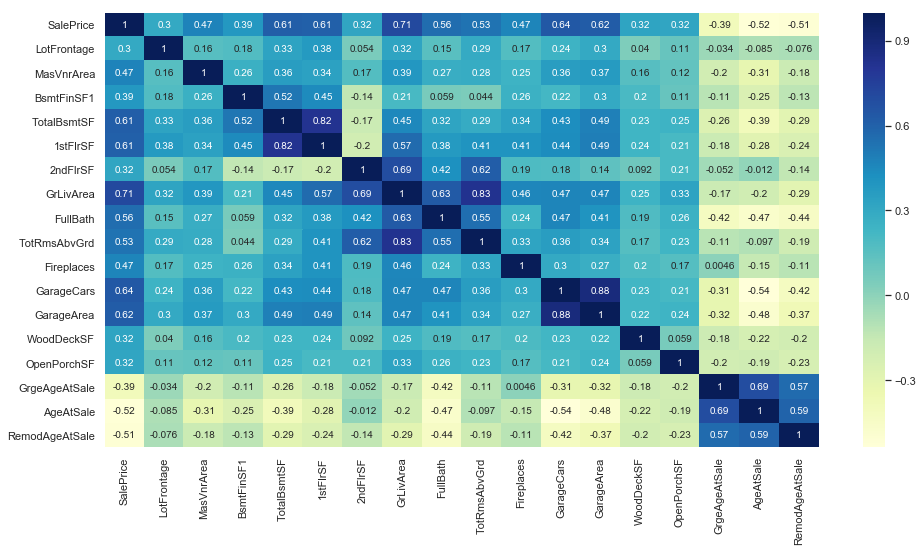

In [1272]:
# Set the figure size
plt.figure(figsize=(16,8))

# Generate the heatmap
sns.heatmap(housing_df[housing_numeric].corr(),cmap='YlGnBu', annot=True)

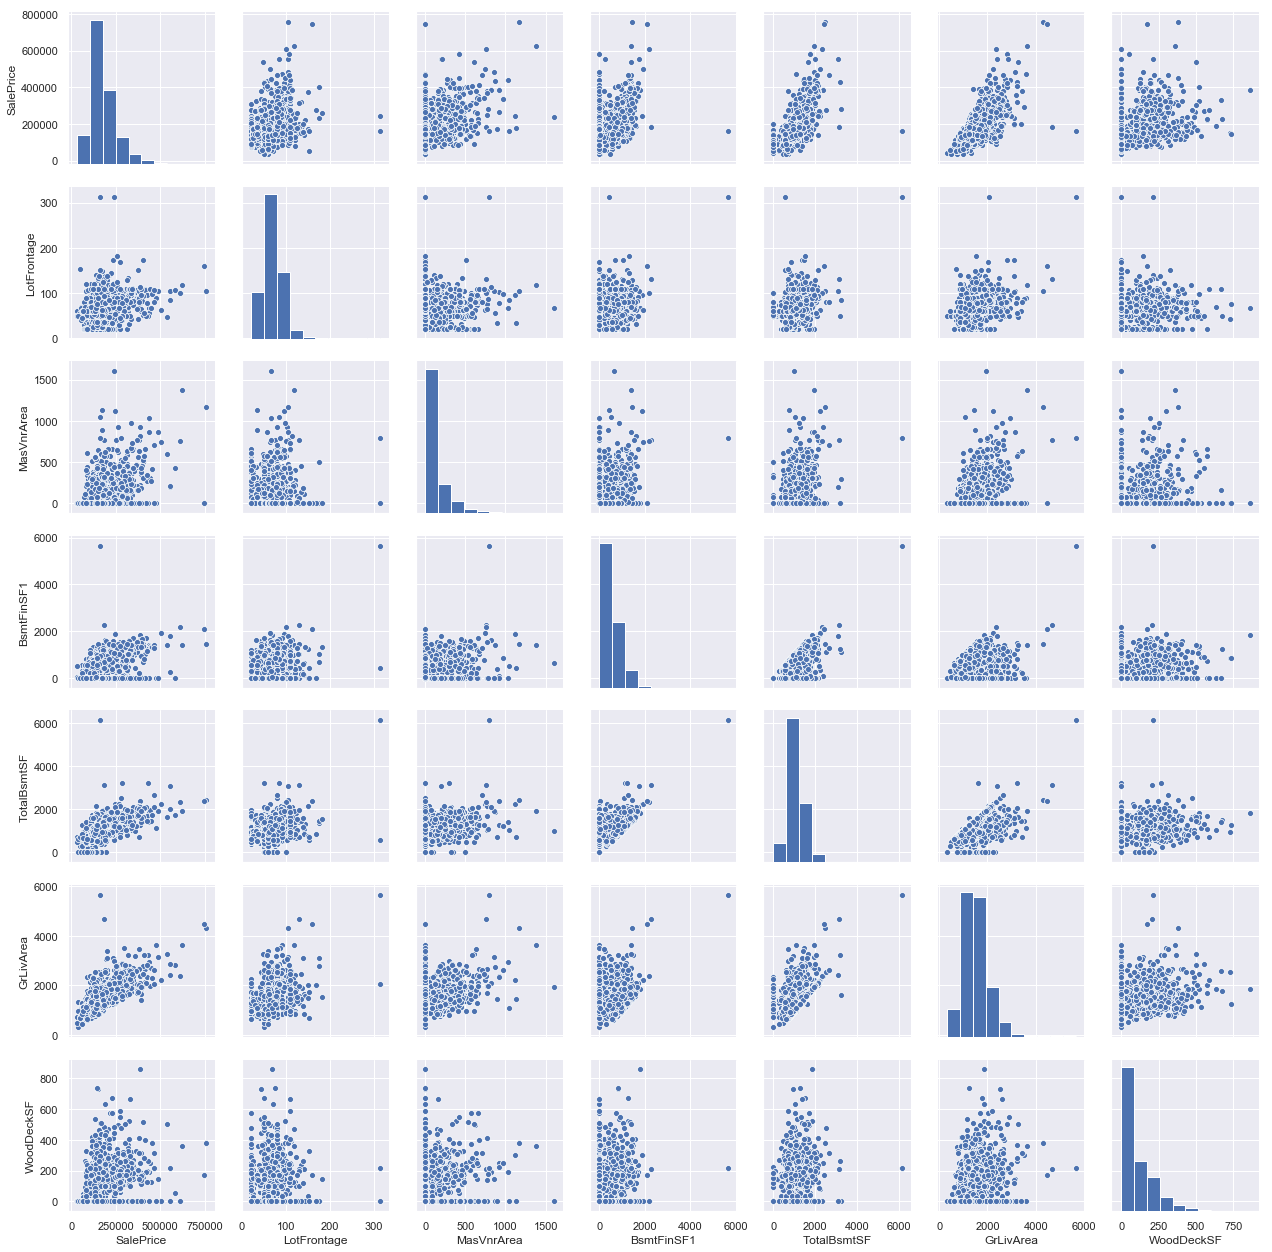

In [1273]:
# removing the column highly cross-correlated columns
housing_df.drop(['GarageArea','GrgeAgeAtSale','TotRmsAbvGrd','1stFlrSF','2ndFlrSF'], axis=1,inplace=True)

# update the list and create new split-lists
housing_numeric =['SalePrice','LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','GrLivArea','WoodDeckSF','FullBath','Fireplaces','GarageCars','AgeAtSale','RemodAgeAtSale','OpenPorchSF']
housing_numeric_1 =['SalePrice','LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','GrLivArea','WoodDeckSF']
housing_numeric_2 =['SalePrice','FullBath','Fireplaces','GarageCars','AgeAtSale','RemodAgeAtSale','OpenPorchSF']


# Visualising the numeric variables Part-1
sns.pairplot(housing_df[housing_numeric_1])

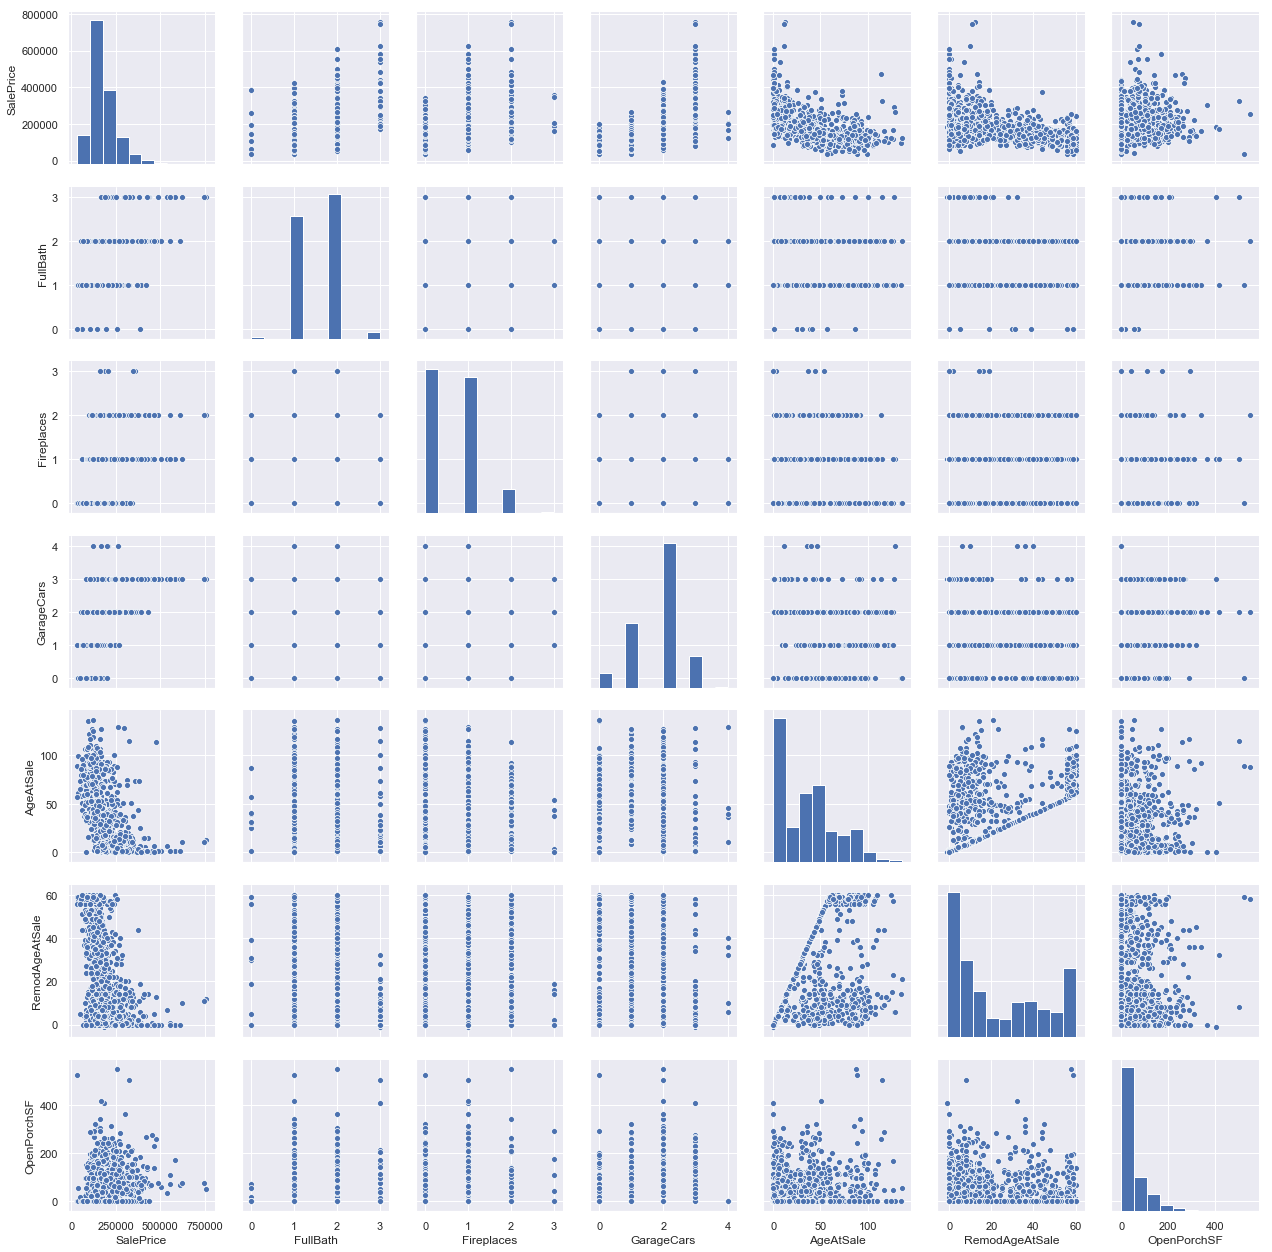

In [1274]:
# Visualising the numeric variables Part-2
sns.pairplot(housing_df[housing_numeric_2])

## <font color=blue>Part 1D : Data Analysis - Visualize the Ordinal variables & Correlation between them</font>

In [1275]:
# Create list of ordinal variables
housing_ord_variables = ['SalePrice','HeatingQC_Ord','KitchenQual_Ord','FireplaceQu_Ord','ExterQual_Ord','ExterCond_Ord','BsmtQual_Ord','BsmtCond_Ord','BsmtExposure_Ord','BsmtFinType1_Ord','BsmtFinType2_Ord','GarageQual_Ord','GarageCond_Ord','GarageFinish_Ord','Functional_Ord','OverallQual','OverallCond']

# correlation matrix
cor_ord = housing_df[housing_ord_variables].corr()
cor_ord

,SalePrice,HeatingQC_Ord,KitchenQual_Ord,FireplaceQu_Ord,ExterQual_Ord,ExterCond_Ord,BsmtQual_Ord,BsmtCond_Ord,BsmtExposure_Ord,BsmtFinType1_Ord,BsmtFinType2_Ord,GarageQual_Ord,GarageCond_Ord,GarageFinish_Ord,Functional_Ord,OverallQual,OverallCond
SalePrice,1.000000,0.427649,0.659600,0.520438,0.682639,0.018899,0.585207,0.212607,0.375045,0.304908,-0.004329,0.273839,0.263191,0.549247,0.107619,0.790982,-0.077856
HeatingQC_Ord,0.427649,1.000000,0.504228,0.207500,0.520027,0.055520,0.397169,0.171797,0.151527,0.155648,-0.026886,0.145477,0.155348,0.392244,0.058352,0.457083,-0.014105
KitchenQual_Ord,0.659600,0.504228,1.000000,0.353806,0.716122,0.057592,0.510938,0.182535,0.255353,0.248978,-0.029198,0.238154,0.232077,0.474570,0.107003,0.673331,-0.026707
FireplaceQu_Ord,0.520438,0.207500,0.353806,1.000000,0.361798,0.005723,0.307337,0.115439,0.167433,0.106162,0.000945,0.221797,0.210507,0.394891,0.030981,0.490788,-0.056899
ExterQual_Ord,0.682639,0.520027,0.716122,0.361798,1.000000,0.009184,0.565558,0.185046,0.249946,0.226197,-0.061983,0.219023,0.214680,0.519054,0.088392,0.726278,-0.138942
ExterCond_Ord,0.018899,0.055520,0.057592,0.005723,0.009184,1.000000,-0.019297,0.144756,0.005564,0.060581,0.069515,0.094924,0.103940,-0.016011,0.100304,0.013953,0.389163
BsmtQual_Ord,0.585207,0.397169,0.510938,0.307337,0.565558,-0.019297,1.000000,0.633713,0.399986,0.377398,0.085909,0.182236,0.192805,0.485184,0.134649,0.629379,-0.164996
BsmtCond_Ord,0.212607,0.171797,0.182535,0.115439,0.185046,0.144756,0.633713,1.000000,0.255937,0.299089,0.242977,0.128744,0.144617,0.183516,0.143093,0.268759,0.132361
BsmtExposure_Ord,0.375045,0.151527,0.255353,0.167433,0.249946,0.005564,0.399986,0.255937,1.000000,0.347301,0.125840,0.077099,0.072320,0.251742,0.072870,0.297137,-0.057102
BsmtFinType1_Ord,0.304908,0.155648,0.248978,0.106162,0.226197,0.060581,0.377398,0.299089,0.347301,1.000000,0.098961,0.146738,0.148338,0.246040,0.116932,0.232503,-0.014479


In [1276]:
# Check low correlated variables
cor_ord.loc[abs(cor_ord['SalePrice']) < 0.3]['SalePrice']

ExterCond_Ord       0.018899
BsmtCond_Ord        0.212607
BsmtFinType2_Ord   -0.004329
GarageQual_Ord      0.273839
GarageCond_Ord      0.263191
Functional_Ord      0.107619
OverallCond        -0.077856
Name: SalePrice, dtype: float64

In [1277]:
# Removing the column low correlated columns
housing_df.drop(['ExterCond_Ord','BsmtCond_Ord','BsmtFinType2_Ord','GarageCond_Ord','Functional_Ord','KitchenQual_Ord','ExterQual_Ord','OverallCond'], axis=1,inplace=True)

#Update the list of ordinal variables
housing_ord_variables = ['SalePrice','HeatingQC_Ord','FireplaceQu_Ord','OverallQual','BsmtQual_Ord','BsmtExposure_Ord','BsmtFinType1_Ord','GarageQual_Ord','GarageFinish_Ord']

cor_ord = housing_df[housing_ord_variables].corr()
cor_ord

,SalePrice,HeatingQC_Ord,FireplaceQu_Ord,OverallQual,BsmtQual_Ord,BsmtExposure_Ord,BsmtFinType1_Ord,GarageQual_Ord,GarageFinish_Ord
SalePrice,1.000000,0.427649,0.520438,0.790982,0.585207,0.375045,0.304908,0.273839,0.549247
HeatingQC_Ord,0.427649,1.000000,0.207500,0.457083,0.397169,0.151527,0.155648,0.145477,0.392244
FireplaceQu_Ord,0.520438,0.207500,1.000000,0.490788,0.307337,0.167433,0.106162,0.221797,0.394891
OverallQual,0.790982,0.457083,0.490788,1.000000,0.629379,0.297137,0.232503,0.292399,0.556863
BsmtQual_Ord,0.585207,0.397169,0.307337,0.629379,1.000000,0.399986,0.377398,0.182236,0.485184
BsmtExposure_Ord,0.375045,0.151527,0.167433,0.297137,0.399986,1.000000,0.347301,0.077099,0.251742
BsmtFinType1_Ord,0.304908,0.155648,0.106162,0.232503,0.377398,0.347301,1.000000,0.146738,0.246040
GarageQual_Ord,0.273839,0.145477,0.221797,0.292399,0.182236,0.077099,0.146738,1.000000,0.482399
GarageFinish_Ord,0.549247,0.392244,0.394891,0.556863,0.485184,0.251742,0.246040,0.482399,1.000000


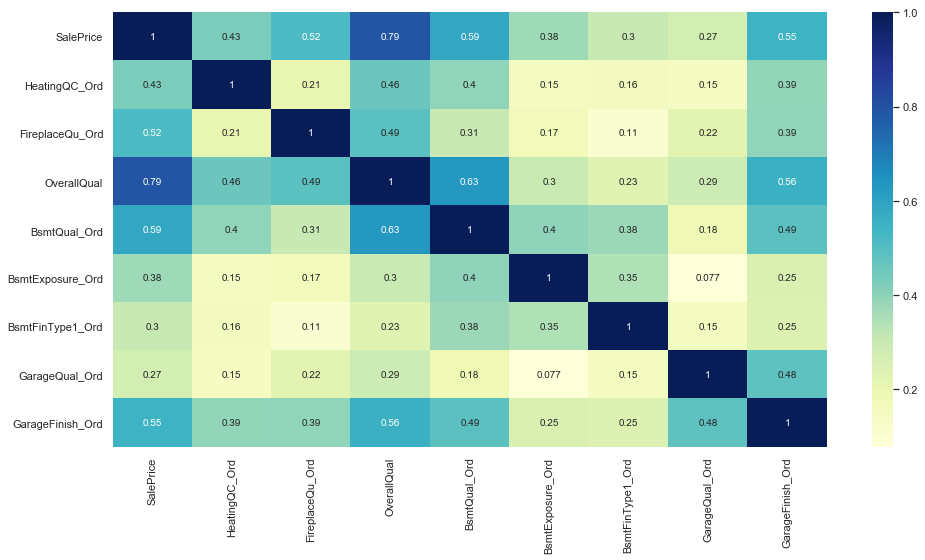

In [1278]:
# Set the figure size
plt.figure(figsize=(16,8))

# Generate the heatmap
sns.heatmap(housing_df[housing_ord_variables].corr(),cmap='YlGnBu', annot=True)

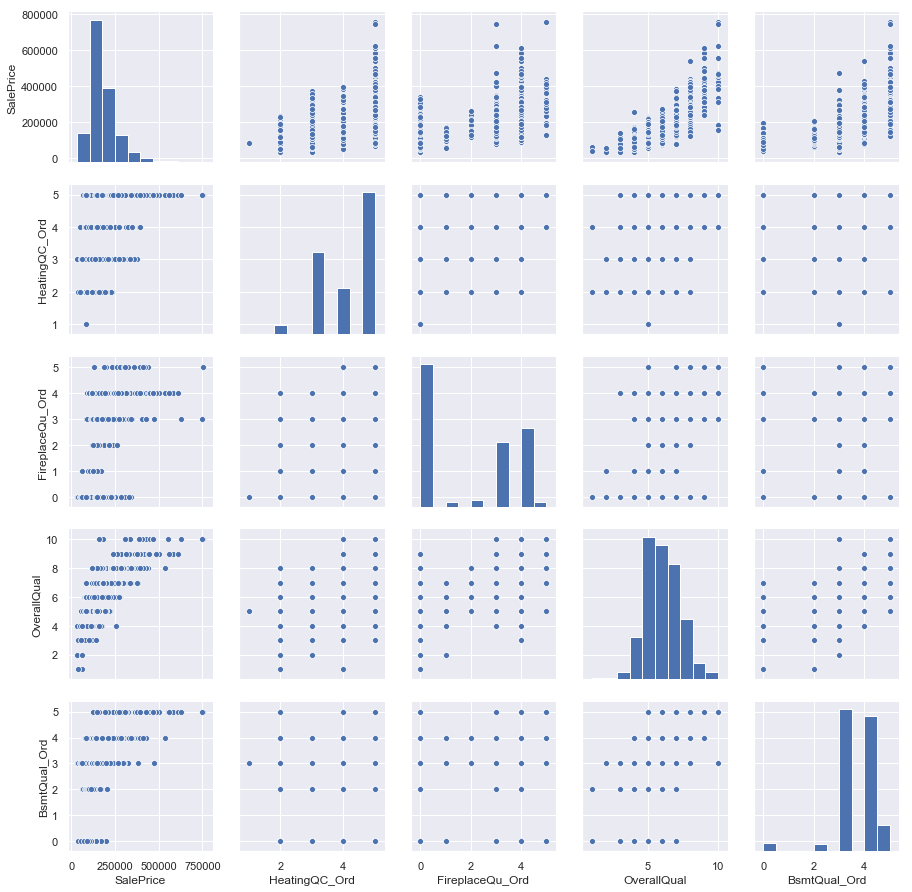

In [1279]:
#Split the list of Ordinal variables
housing_ord_variables_1 = ['SalePrice','HeatingQC_Ord','FireplaceQu_Ord','OverallQual','BsmtQual_Ord']
housing_ord_variables_2 = ['SalePrice','BsmtExposure_Ord','BsmtFinType1_Ord','GarageQual_Ord','GarageFinish_Ord']

# Visualising the Ordinal variables List-1
sns.pairplot(housing_df[housing_ord_variables_1])

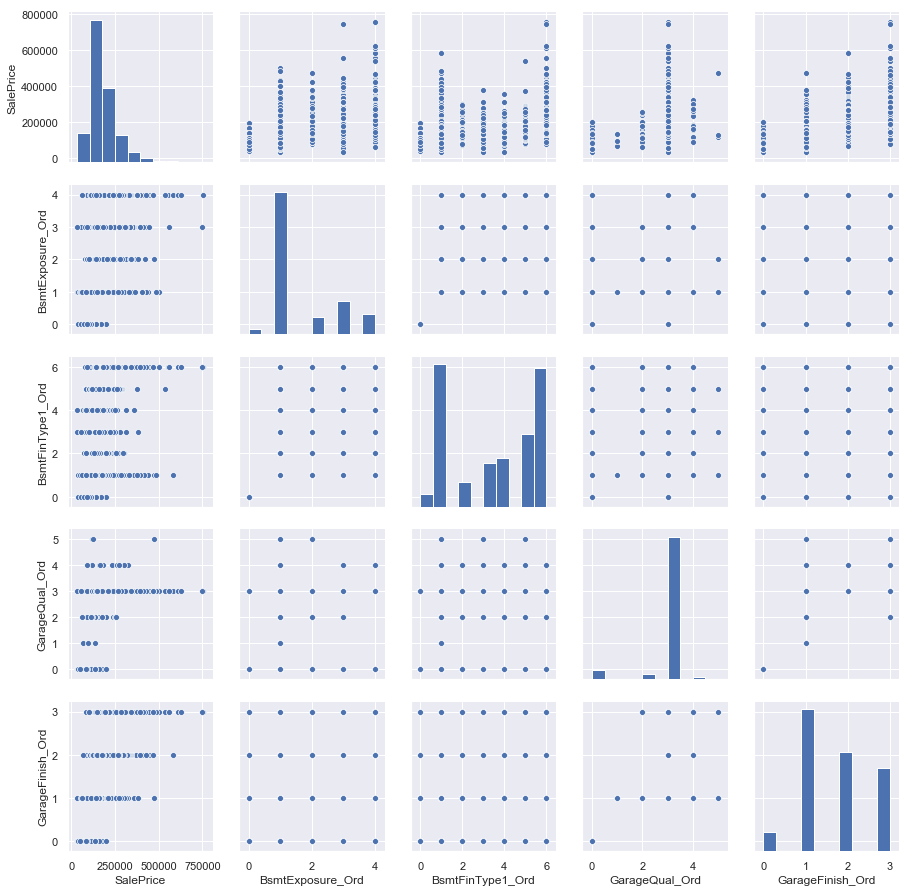

In [1280]:
# Visualising the numeric variables List-2
sns.pairplot(housing_df[housing_ord_variables_2])

In [1281]:
# removing the two low correlated columns
housing_df.drop(['BsmtFinType1_Ord','GarageQual_Ord'], axis=1,inplace=True)

#Update the list
housing_ord_variables = ['SalePrice','HeatingQC_Ord','FireplaceQu_Ord','OverallQual','BsmtQual_Ord','BsmtExposure_Ord','GarageFinish_Ord']

In [1282]:
#Check the DataFrame
housing_df.head()

,Id,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,TotalBsmtSF,Heating,Electrical,GrLivArea,FullBath,Fireplaces,GarageType,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,AgeAtSale,RemodAgeAtSale,MSSubClassType,HeatingQC_Ord,FireplaceQu_Ord,BsmtQual_Ord,BsmtExposure_Ord,CentralAir_Bool,GarageFinish_Ord
0,1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,856,GasA,SBrkr,1710,2,0,Attchd,2,Y,0,61,WD,Normal,208500,5,5,Type60,5,0,4,1,1,2
1,2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,1262,GasA,SBrkr,1262,2,1,Attchd,2,Y,298,0,WD,Normal,181500,31,31,Type20,5,3,4,4,1,2
2,3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,920,GasA,SBrkr,1786,2,1,Attchd,2,Y,0,42,WD,Normal,223500,7,6,Type60,5,3,4,2,1,2
3,4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,756,GasA,SBrkr,1717,1,1,Detchd,3,Y,0,35,WD,Abnorml,140000,91,36,Type70,4,4,3,1,1,1
4,5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,1145,GasA,SBrkr,2198,2,1,Attchd,3,Y,192,84,WD,Normal,250000,8,8,Type60,5,3,4,3,1,2


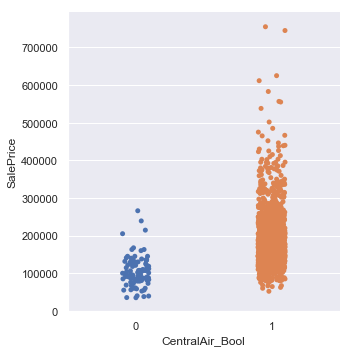

In [1283]:
# Visualising the Boolean variable
sns.catplot(x='CentralAir_Bool',y='SalePrice',data=housing_df)

### <font color = blue> Visualize the distribution of Target Variable - Univariate Analysis</font>

Text(0, 0.5, 'No. of records')

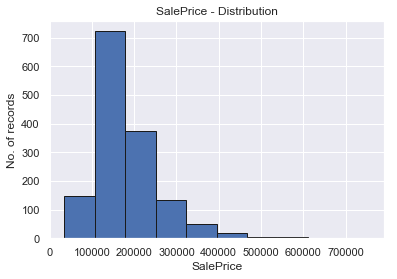

In [1284]:
housing_df['SalePrice'].plot.hist(edgecolor = 'k')
plt.title('SalePrice - Distribution')
plt.xlabel('SalePrice')
plt.ylabel('No. of records')

### <font color = blue> Visualize the distribution of Target Variable with Area - Bivariate Analysis</font>

Text(0.5, 1.0, 'Variation of Sale Price with Total Living Area of Houses')

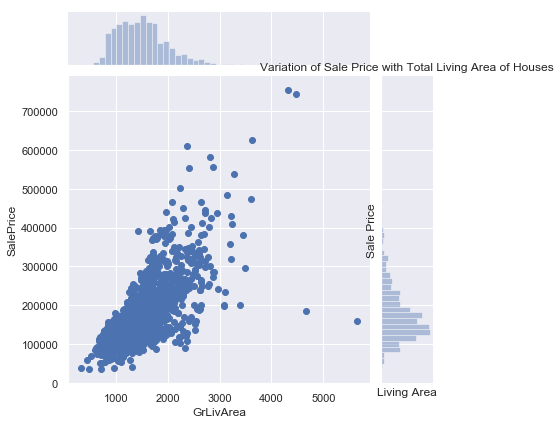

In [1285]:
# plotting
sns.jointplot(x='GrLivArea', y='SalePrice', data = housing_df)
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.title("Variation of Sale Price with Total Living Area of Houses")

## <font color=blue>Part 1E : Data Analysis - Categorical Variables & Encoding (Dummies)</font>

In [1286]:
#List of Categorical Features
housing_categ_variables=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','SaleType','SaleCondition','MSSubClassType']

In [1287]:
housing_df[housing_categ_variables].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClassType
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,WD,Normal,Type60
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Y,WD,Normal,Type20
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,WD,Normal,Type60
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Y,WD,Abnorml,Type70
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,WD,Normal,Type60


In [1288]:
# Check the unique counts for all columns across the data set
for x in housing_categ_variables:
    print(x+':',len(housing_df[x].unique()))

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
Foundation: 6
Heating: 6
Electrical: 5
GarageType: 7
PavedDrive: 3
SaleType: 9
SaleCondition: 6
MSSubClassType: 15


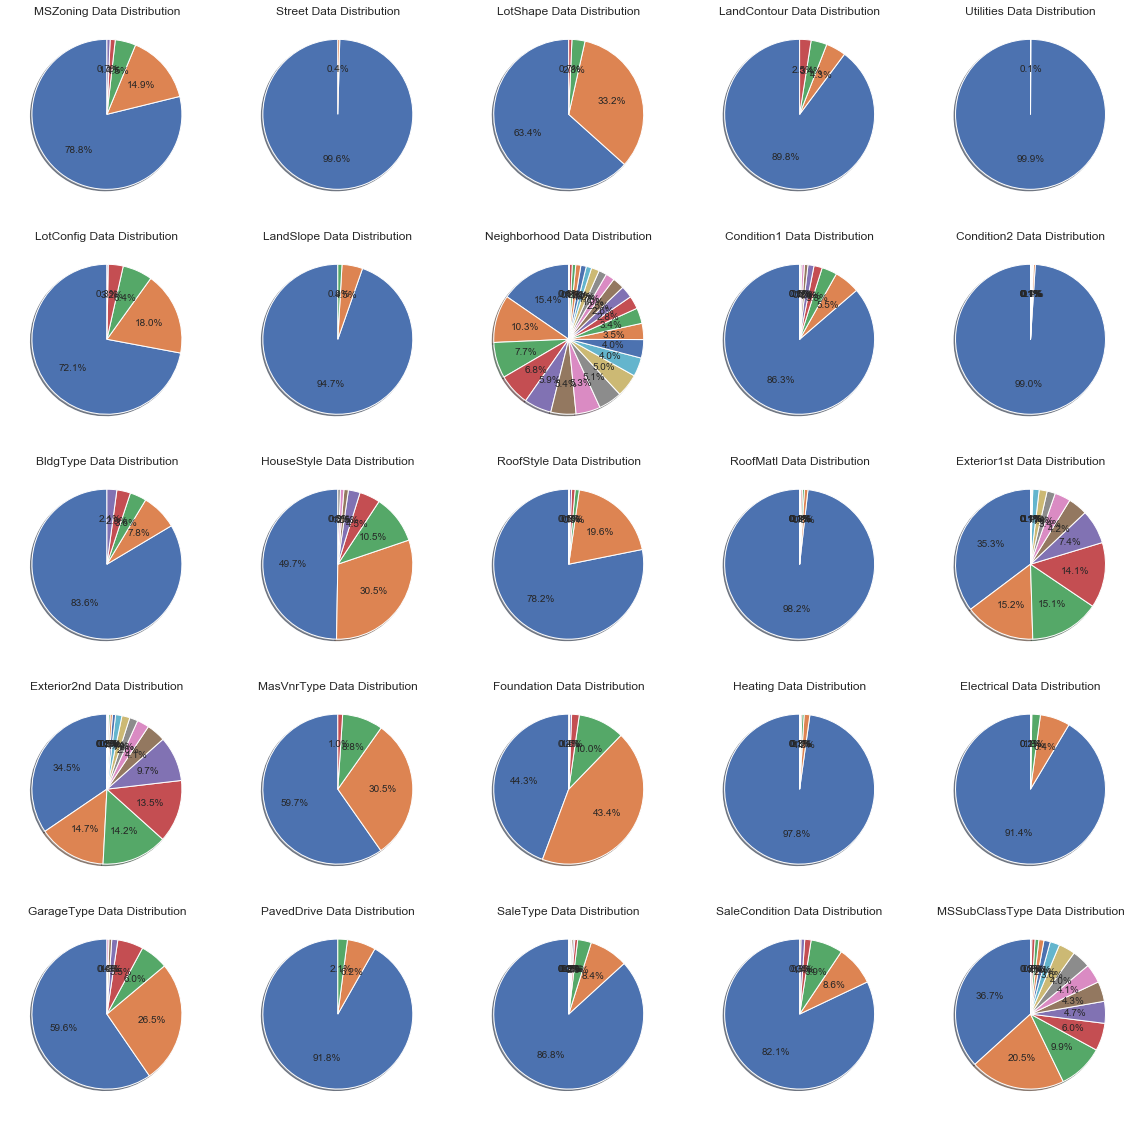

In [1289]:
# Visualising the Pie distribution of all categorical variables
plt.figure(figsize=(20,20))
for i in range(len(housing_categ_variables)):
    plt.subplot(5, 5, i+1)
    var=housing_categ_variables[i]
    pie_sizes_m = housing_df[var].value_counts()/len(housing_df.index) * 100
    plt.pie(pie_sizes_m, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.title(var+' Data Distribution')

In [1290]:
# removing the column with sparse distribution (Single-valued categ features)
housing_df.drop(['Street','Utilities','Condition2','RoofMatl','Heating'], axis=1,inplace=True)

housing_categ_variables=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','Electrical','GarageType','PavedDrive','SaleType','SaleCondition','MSSubClassType']

In [1291]:
len(housing_categ_variables)

20

In [1292]:
# Get the least occuring value for each Categ Feature
categ_least_value=[housing_df[categ_col].value_counts().sort_values().index[0] for categ_col in housing_categ_variables]

categ_least_value

['C (all)',
 'IR3',
 'Low',
 'FR3',
 'Sev',
 'Blueste',
 'RRNe',
 '2fmCon',
 '2.5Fin',
 'Shed',
 'ImStucc',
 'Other',
 'BrkCmn',
 'Wood',
 'Mix',
 '2Types',
 'P',
 'Con',
 'AdjLand',
 'Type40']

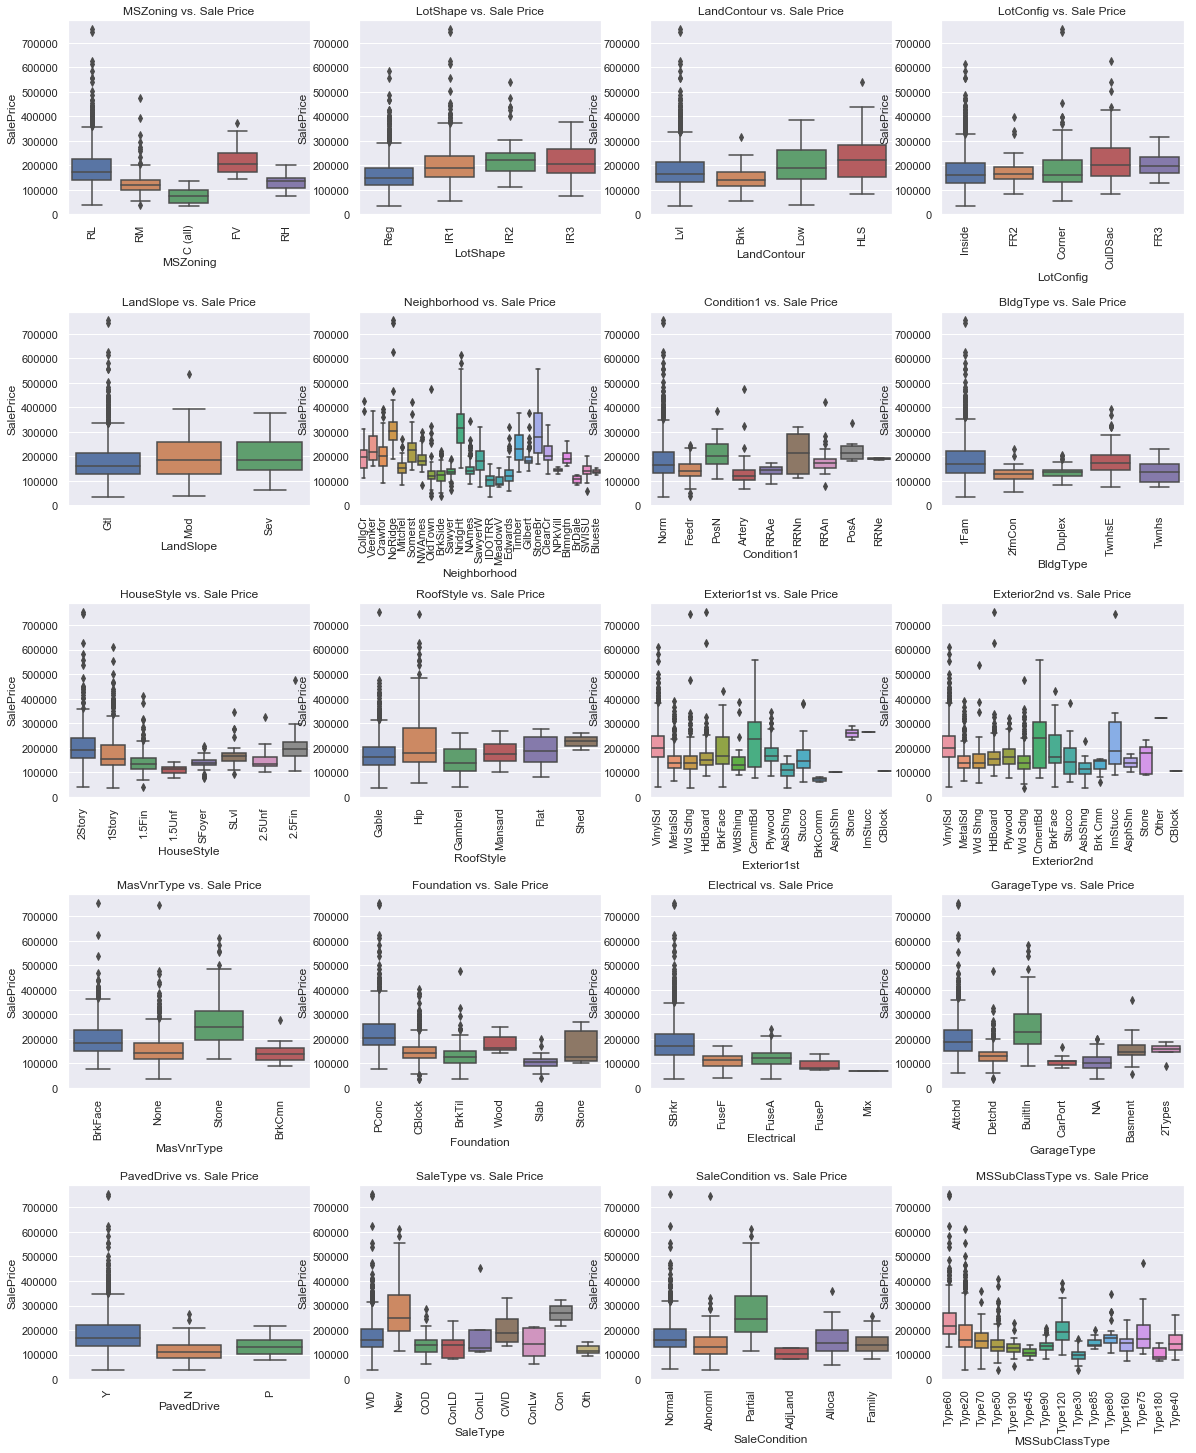

In [1293]:
# Create a box plot of all the categ variables vs Sale Price
plt.figure(figsize=(20,25))
for j in range(len(housing_categ_variables)):
    var=housing_categ_variables[j]
    plt.subplot(5, 4, j+1)
    plt.title(var+' vs. Sale Price')
    sns.boxplot(x=var,y='SalePrice',data=housing_df)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.5)

In [1294]:
#Create the dummy variables and drop the "Others" values

for i in range(len(housing_categ_variables)):
    # Creating dummy variables for category variables
    var=housing_categ_variables[i]
    dummy_df = pd.get_dummies(housing_df[var],prefix=var)
    housing_df = pd.concat([housing_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    housing_df.drop([var,var+'_'+categ_least_value[i]], axis =1 , inplace=True)

In [1295]:
housing_df.head()

,Id,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeAtSale,RemodAgeAtSale,HeatingQC_Ord,FireplaceQu_Ord,BsmtQual_Ord,BsmtExposure_Ord,CentralAir_Bool,GarageFinish_Ord,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClassType_Type120,MSSubClassType_Type160,MSSubClassType_Type180,MSSubClassType_Type190,MSSubClassType_Type20,MSSubClassType_Type30,MSSubClassType_Type45,MSSubClassType_Type50,MSSubClassType_Type60,MSSubClassType_Type70,MSSubClassType_Type75,MSSubClassType_Type80,MSSubClassType_Type85,MSSubClassType_Type90
0,1,65.0,7,196.0,706,856,1710,2,0,2,0,61,208500,5,5,5,0,4,1,1,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,80.0,6,0.0,978,1262,1262,2,1,2,298,0,181500,31,31,5,3,4,4,1,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,68.0,7,162.0,486,920,1786,2,1,2,0,42,223500,7,6,5,3,4,2,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,60.0,7,0.0,216,756,1717,1,1,3,0,35,140000,91,36,4,4,3,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,84.0,8,350.0,655,1145,2198,2,1,3,192,84,250000,8,8,5,3,4,3,1,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1296]:
# removing the Id unique column
housing_df.drop(['Id'], axis=1,inplace=True)

## <font color=blue>Part 1F : Data Analysis - Outlier Treatment</font>

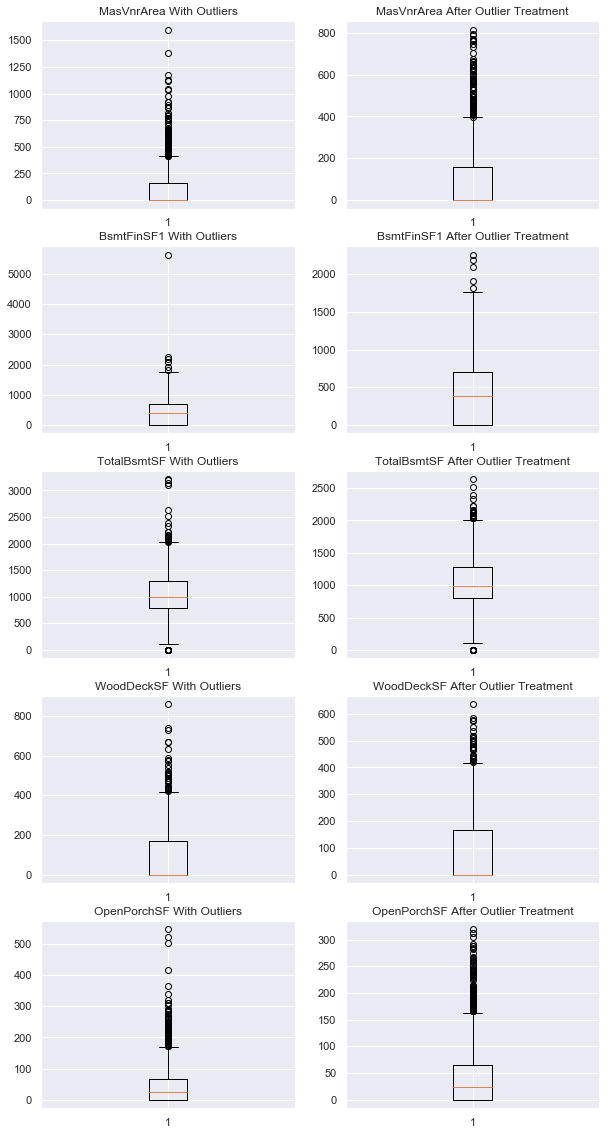

In [1297]:
#Make List of variables for Outlier treatment
housing_outlier_variables=['MasVnrArea','BsmtFinSF1','TotalBsmtSF','WoodDeckSF','OpenPorchSF']
housing_df1=housing_df.copy()
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(10,20))
p=0
for j in range(len(housing_outlier_variables)):
    var=housing_outlier_variables[j]
    p=p+1
    plt.subplot(5, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(housing_df1[var])
    Q1 = housing_df1[var].quantile(0.10)
    Q3 = housing_df1[var].quantile(0.90)
    IQR = Q3 - Q1
    housing_df1 = housing_df1[(housing_df1[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(5, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(housing_df1[var])

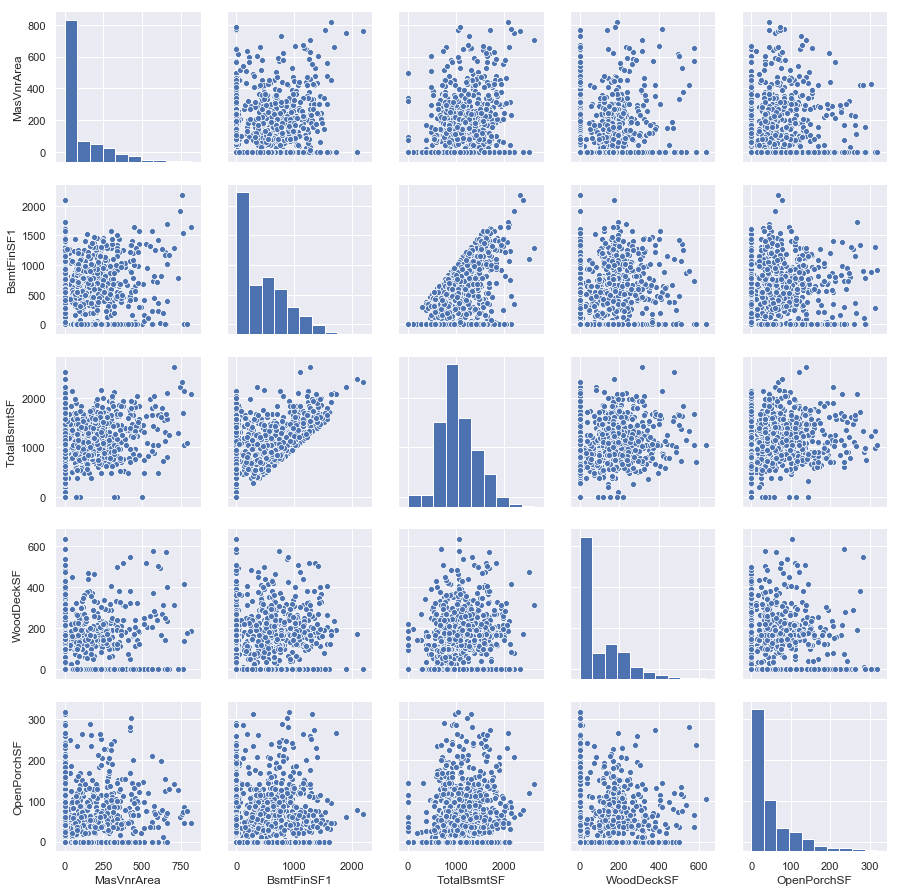

In [1298]:
#Plot the Sale Price variation after Outlier treatment
sns.pairplot(housing_df1[housing_outlier_variables])

In [1299]:
#Get the shape of new DataFrame
housing_df1.shape

(1431, 160)

In [1300]:
housing_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1458
Columns: 160 entries, LotFrontage to MSSubClassType_Type90
dtypes: float64(2), int64(18), uint8(140)
memory usage: 470.4 KB


## <font color=blue>Part 2 : Data Preparation - Scaling</font>

In [1301]:
# Prepare X and Y list
X=housing_df1.drop(['SalePrice'], axis =1)
X.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,AgeAtSale,RemodAgeAtSale,HeatingQC_Ord,FireplaceQu_Ord,BsmtQual_Ord,BsmtExposure_Ord,CentralAir_Bool,GarageFinish_Ord,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClassType_Type120,MSSubClassType_Type160,MSSubClassType_Type180,MSSubClassType_Type190,MSSubClassType_Type20,MSSubClassType_Type30,MSSubClassType_Type45,MSSubClassType_Type50,MSSubClassType_Type60,MSSubClassType_Type70,MSSubClassType_Type75,MSSubClassType_Type80,MSSubClassType_Type85,MSSubClassType_Type90
0,65.0,7,196.0,706,856,1710,2,0,2,0,61,5,5,5,0,4,1,1,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,80.0,6,0.0,978,1262,1262,2,1,2,298,0,31,31,5,3,4,4,1,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,68.0,7,162.0,486,920,1786,2,1,2,0,42,7,6,5,3,4,2,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,60.0,7,0.0,216,756,1717,1,1,3,0,35,91,36,4,4,3,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,8,350.0,655,1145,2198,2,1,3,192,84,8,8,5,3,4,3,1,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1302]:
# Create the Y variable
y = housing_df1['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1303]:
# Split 70:30 into Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [1304]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
scaler = StandardScaler()

X_train[housing_scale_variables] = scaler.fit_transform(X_train[housing_scale_variables])
X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,AgeAtSale,RemodAgeAtSale,HeatingQC_Ord,FireplaceQu_Ord,BsmtQual_Ord,BsmtExposure_Ord,CentralAir_Bool,GarageFinish_Ord,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClassType_Type120,MSSubClassType_Type160,MSSubClassType_Type180,MSSubClassType_Type190,MSSubClassType_Type20,MSSubClassType_Type30,MSSubClassType_Type45,MSSubClassType_Type50,MSSubClassType_Type60,MSSubClassType_Type70,MSSubClassType_Type75,MSSubClassType_Type80,MSSubClassType_Type85,MSSubClassType_Type90
690,-0.746865,-0.008867,0.371253,0.631159,-0.459947,-1.344654,-0.988751,0.648962,0.349556,0.519328,-0.745074,-1.107753,-0.940937,0.898982,0.697066,0.614301,2.257754,1,0.356652,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1315,0.747156,-0.008867,-0.610466,0.159829,-0.197614,1.372615,0.896468,2.221870,0.349556,1.637443,-0.745074,0.068062,0.751436,-1.174477,1.253496,-1.625827,0.368902,1,-0.773122,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
151,1.691652,1.470373,2.301299,2.313112,1.714389,0.508421,0.896468,0.648962,1.690189,-0.752422,0.962219,-1.208537,-1.134351,0.898982,1.253496,1.734365,2.257754,1,0.356652,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1056,-1.055972,0.730753,0.992340,0.540242,0.841628,-0.235389,0.896468,0.648962,0.349556,0.886343,-0.142500,-1.208537,-1.085997,0.898982,1.253496,0.614301,1.313328,1,0.356652,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1039,-2.000468,-1.488106,-0.610466,0.181362,-1.009837,-1.813297,-0.988751,-0.923946,-0.991078,-0.752422,-0.745074,0.068062,0.751436,-1.174477,-0.972224,0.614301,1.313328,1,-0.773122,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1305]:
# Transform the test data using the scaler from Training data

X_test[housing_scale_variables] = scaler.transform(X_test[housing_scale_variables])
X_test.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,AgeAtSale,RemodAgeAtSale,HeatingQC_Ord,FireplaceQu_Ord,BsmtQual_Ord,BsmtExposure_Ord,CentralAir_Bool,GarageFinish_Ord,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_N,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClassType_Type120,MSSubClassType_Type160,MSSubClassType_Type180,MSSubClassType_Type190,MSSubClassType_Type20,MSSubClassType_Type30,MSSubClassType_Type45,MSSubClassType_Type50,MSSubClassType_Type60,MSSubClassType_Type70,MSSubClassType_Type75,MSSubClassType_Type80,MSSubClassType_Type85,MSSubClassType_Type90
59,-0.326135,-0.748486,-0.610466,0.475644,-0.631472,-1.490836,-0.988751,-0.923946,-0.991078,0.920484,-0.745074,-0.032722,0.606375,0.898982,-0.972224,-0.505763,1.313328,1,-0.773122,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1147,0.317840,0.730753,-0.610466,-0.378492,-0.823177,0.194559,-0.988751,0.648962,-0.991078,-0.752422,-0.745074,1.042309,1.718505,0.898982,1.253496,-0.505763,-0.575524,1,-0.773122,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
379,-0.326135,-0.008867,-0.503612,-1.036439,-0.121941,0.701897,0.896468,0.648962,0.349556,0.101101,0.309430,-0.939780,-0.699169,0.898982,0.697066,0.614301,-0.575524,1,1.486426,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
992,0.532498,-0.008867,1.660176,0.245960,-0.525530,0.811534,0.896468,0.648962,0.349556,1.287499,-0.042071,0.202441,-0.457402,-0.137747,0.140636,-0.505763,2.257754,1,0.356652,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1060,-1.141836,1.470373,-0.610466,0.437363,0.776045,-0.291282,0.896468,-0.923946,0.349556,-0.752422,-0.745074,-0.939780,-0.699169,0.898982,-0.972224,0.614301,0.368902,1,1.486426,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## <font color=blue>Part 2 : Model creation using Linear Regression & Statsmodel</font>

In [1306]:
# As we have huge number of combined Numerical & Dummy variables, we will be using RFE to reduce the count of variables
# RFE = Recursive Feature Elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 39)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Assign the column list
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'GrLivArea', 'Neighborhood_Blmngtn',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_Timber', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd',
       'Exterior2nd_Stone', 'Exterior2nd_VinylSd', 'Foundation_Stone',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_Normal',
       'MSSubClassType_Type160', 'MSSubClassType_Type180',
       'MSSubClassType_Type190', 'MSSubClassType_Type50',
       'MSSubClassType_Type90'],
      dtype='object')

In [1307]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
# Use the Ordinary Least Squares method to get a straight line fit for the data
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:05:44   Log-Likelihood:                -11531.
No. Observations:                1001   AIC:                         2.314e+04
Df Residuals:                     962   BIC:                         2.333e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.86

In [1308]:
# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,BldgType_Duplex,inf
38,MSSubClassType_Type90,inf
33,SaleCondition_Normal,5.360000
34,MSSubClassType_Type160,3.000000
23,HouseStyle_2Story,2.890000
29,Exterior2nd_VinylSd,2.720000
0,OverallQual,2.590000
2,GrLivArea,2.570000
20,BldgType_Twnhs,2.270000
10,Neighborhood_NAmes,2.100000


In [1309]:
# Drop two variables with low p-value
X_train_rfe.drop(['Exterior2nd_Stone','Exterior2nd_VinylSd'],axis=1,inplace=True)

In [1310]:
# Repeat the steps to get a new model - Adding a constant variable 
X_train_rfe_sm_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe_sm_1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:05:46   Log-Likelihood:                -11550.
No. Observations:                1001   AIC:                         2.317e+04
Df Residuals:                     964   BIC:                         2.335e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.90

In [1311]:
# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,MSSubClassType_Type90,inf
19,BldgType_Duplex,inf
31,SaleCondition_Normal,5.200000
32,MSSubClassType_Type160,2.950000
23,HouseStyle_2Story,2.840000
2,GrLivArea,2.570000
0,OverallQual,2.540000
20,BldgType_Twnhs,2.260000
10,Neighborhood_NAmes,2.080000
21,BldgType_TwnhsE,1.920000


In [1312]:
# Drop High VIF values
X_train_rfe.drop(['MSSubClassType_Type90'],axis=1,inplace=True)

In [1313]:
# Repeat the steps to get a new model - Adding a constant variable 
X_train_rfe_sm_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe_sm_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:05:48   Log-Likelihood:                -11550.
No. Observations:                1001   AIC:                         2.317e+04
Df Residuals:                     964   BIC:                         2.335e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.90

In [1314]:
# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,SaleCondition_Normal,5.20
32,MSSubClassType_Type160,2.95
23,HouseStyle_2Story,2.84
2,GrLivArea,2.57
0,OverallQual,2.54
20,BldgType_Twnhs,2.26
10,Neighborhood_NAmes,2.08
21,BldgType_TwnhsE,1.92
35,MSSubClassType_Type50,1.59
12,Neighborhood_OldTown,1.58


In [1315]:
# Drop High VIF value columns
X_train_rfe.drop(['Exterior2nd_CmentBd'],axis=1,inplace=True)

In [1316]:
# Repeat the steps to get a new model - Adding a constant variable 
X_train_rfe_sm_3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe_sm_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     193.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:05:51   Log-Likelihood:                -11553.
No. Observations:                1001   AIC:                         2.318e+04
Df Residuals:                     965   BIC:                         2.335e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.91

In [1317]:
# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,SaleCondition_Normal,5.11
31,MSSubClassType_Type160,2.95
23,HouseStyle_2Story,2.84
2,GrLivArea,2.57
0,OverallQual,2.54
20,BldgType_Twnhs,2.26
10,Neighborhood_NAmes,2.07
21,BldgType_TwnhsE,1.90
34,MSSubClassType_Type50,1.59
12,Neighborhood_OldTown,1.58


In [1318]:
# Drop High VIF value columns
X_train_rfe.drop(['SaleCondition_Normal'],axis=1,inplace=True)

In [1319]:
# Repeat the steps to get a new model - Adding a constant variable 
X_train_rfe_sm_4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe_sm_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:05:53   Log-Likelihood:                -11575.
No. Observations:                1001   AIC:                         2.322e+04
Df Residuals:                     966   BIC:                         2.339e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.07

In [1320]:
# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,MSSubClassType_Type160,2.93
23,HouseStyle_2Story,2.62
2,GrLivArea,2.56
0,OverallQual,2.47
20,BldgType_Twnhs,2.22
21,BldgType_TwnhsE,1.79
33,MSSubClassType_Type50,1.57
16,Neighborhood_Somerst,1.41
12,Neighborhood_OldTown,1.39
10,Neighborhood_NAmes,1.38


### <font color = blue> We have final Linear model Fit with 34 features (+ 1 Constant) </font>
### <font color = blue> Predict the test and train values with the Linear model </font>

In [1321]:
# Calculate y_train_pred and verify the model
y_train_pred = lm_4.predict(X_train_rfe_sm_4)

In [1322]:
# Prepae the X_test values
X_test_sm4 = X_test[X_train_rfe.columns]

In [1323]:
# Adding a constant variable 
X_test_sm4 = sm.add_constant(X_test_sm4)

In [1324]:
#Predict y_test
y_test_predict = lm_4.predict(X_test_sm4)

### <font color = blue>Linear Regression: r2 Scores</font>

In [1325]:
# Evaluate the model -> Compute the R-squared
print("Linear Model: Training Data R-squared value=",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Linear Model: Test Data R-squared value=",r2_score(y_true=y_test,y_pred=y_test_predict))

Linear Model: Training Data R-squared value= 0.8695806160492788
Linear Model: Test Data R-squared value= 0.8314223101334708


## <font color=blue>Part 3 : Model Selection using Ridge Regression & Regularization</font>

In [1326]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1327]:
# Create the Dataframe using the Model results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020795,0.007329,0.002399,0.001959,0.0001,{'alpha': 0.0001},-18510.970292,-18272.653369,-18079.510273,-19258.017562,-17621.285569,-18348.649733,540.229661,26,-14125.563742,-14083.980929,-14178.969033,-13817.838498,-13973.446384,-14035.959717,128.274211
1,0.015995,0.009119,0.004799,0.001599,0.001,{'alpha': 0.001},-18508.861597,-18264.660906,-18074.589318,-19256.474762,-17617.017286,-18344.485150,541.449737,25,-14125.938914,-14085.624433,-14180.243756,-13818.842999,-13973.992262,-14036.928473,128.339913
2,0.039187,0.010848,0.006398,0.008977,0.01,{'alpha': 0.01},-18488.589037,-18193.959699,-18029.038328,-19241.405205,-17576.827491,-18306.146395,552.795382,24,-14128.884382,-14100.564260,-14191.686406,-13828.151824,-13979.972366,-14045.851848,128.754786
3,0.024793,0.015672,0.000800,0.001599,0.05,{'alpha': 0.05},-18466.032966,-17991.000054,-17868.780481,-19186.953665,-17441.634049,-18191.155121,595.239130,23,-14145.587627,-14149.541857,-14225.512265,-13866.454577,-14005.320476,-14078.483360,127.654850
4,0.016111,0.009216,0.004416,0.004103,0.1,{'alpha': 0.1},-18450.262353,-17841.670814,-17715.845447,-19136.918318,-17332.077335,-18095.709406,632.521633,22,-14161.125461,-14190.121116,-14253.805871,-13903.472361,-14036.443300,-14108.993622,124.717701


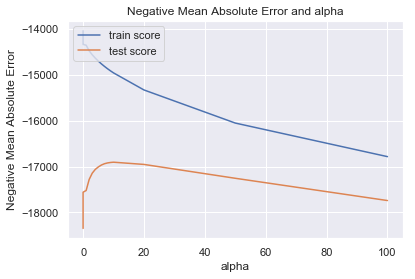

In [1328]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### <font color = blue>From the above graph, we can observe that the best value of alpha is around 15 (both test & train are balanced) </font>

In [1329]:
# Create Ridge Model using Alpha(Regularization parameter) = 15
alpha = 15
ridge = Ridge(alpha=alpha)

#Fit the data and get coefficients
ridge.fit(X_train, y_train)
ridge.coef_

array([  1970.52993305,  17611.8241775 ,   4259.37800079,   9402.94108724,
         3942.69164317,  23645.44593404,  -1113.39719572,   3850.13834964,
         6453.97790918,   2691.41734924,   2735.29503785,  -3316.44401544,
        -4948.14926488,    769.19656955,   -690.01738354,    -88.47988978,
         5723.35432571,   -171.75659078,   1312.58876481,   3146.50743916,
         3306.70521428,   4907.11553488,  -3712.72919835,  -2242.75001109,
         5322.93976689,  -3617.42414658,  -2991.85637337,   4473.90438896,
         -939.9150318 ,  -1337.31588677,   4339.05240358,  -3326.69670243,
           42.85116278,   -489.19078288,   -291.85671344,  -3825.9470357 ,
         3614.85108898,   4944.08727674,   3285.92941453,  -7430.74867094,
        14555.02918937,  -7945.19119176, -10313.68828784,    145.80313033,
        -3232.33295276,  -7740.78722906,  -7075.87467723,   2157.04716275,
        -8837.52921144,   8752.08378851,  14654.22567867,  -3865.91385474,
        -6576.14270642,  

In [1330]:
lasso = Lasso(random_state=42)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   23.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1331]:
# Read the results into DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.283811,0.042459,0.005124,0.005741,0.0001,{'alpha': 0.0001},-18537.104118,-18256.580362,-18139.271742,-19319.678735,-17592.651411,-18369.225153,565.459415,27,-14129.902826,-14086.780692,-14183.787444,-13822.312769,-13973.853684,-14039.327483,128.613051
1,0.221868,0.025000,0.000000,0.000000,0.001,{'alpha': 0.001},-18537.102148,-18256.585415,-18138.909900,-19310.452115,-17592.598901,-18367.299498,562.407838,26,-14129.913822,-14086.805540,-14183.807884,-13822.341964,-13973.844595,-14039.342761,128.612099
2,0.324989,0.074867,0.000000,0.000000,0.01,{'alpha': 0.01},-18537.086413,-18256.635994,-18135.297381,-19255.552552,-17592.071768,-18355.510398,544.579876,23,-14130.040459,-14087.132902,-14184.038968,-13822.646959,-13973.850632,-14039.541984,128.602530
3,0.316106,0.062212,0.003125,0.006250,0.05,{'alpha': 0.05},-18535.140549,-18256.861903,-18121.833281,-19307.458619,-17589.670777,-18362.365801,563.499372,25,-14130.589767,-14088.592419,-14185.142335,-13824.005042,-13974.286911,-14040.523295,128.533801
4,0.184369,0.018221,0.003125,0.006249,0.1,{'alpha': 0.1},-18531.242544,-18256.591763,-18110.132128,-19299.442740,-17584.992969,-18356.655016,562.875876,24,-14131.274760,-14090.475809,-14186.544663,-13825.623830,-13975.022734,-14041.788359,128.465889


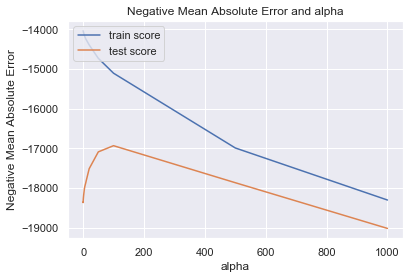

In [1332]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### <font color = blue>From the above graph, we can observe that the best value of alpha is around 100 (both test & train are balanced) </font>

In [1333]:
# Create Lasso Model using Alpha(Regularization parameter) = 100
alpha =100

lasso = Lasso(alpha=alpha,random_state=42)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1334]:
lasso.coef_

array([ 1496.02710935, 17483.22106886,  3877.06252577,  9534.6624751 ,
        3175.29115131, 24514.09153333,  -786.6714265 ,  3151.19863947,
        6419.84606624,  2590.56504483,  2560.11990241, -4488.24833738,
       -4824.49266977,   517.36657579,  -264.95929021,  -183.30086703,
        6098.0226412 ,    -0.        ,  1060.37664999,     0.        ,
           0.        ,  1129.2456214 , -5767.32668707,    -0.        ,
        8010.30143176,  -835.46941407,  -102.21112658,  3325.05872933,
          -0.        ,  -766.71179656,  4311.29759362, -1108.18734334,
           0.        ,    -0.        ,     0.        ,    -0.        ,
           0.        ,  6549.19366626,  1721.59895585, -5488.84935552,
       20731.08564332, -5700.77877262, -8641.05759978,     0.        ,
          -0.        , -6546.49040497, -5064.43368737,     0.        ,
       -8607.37544734, 13080.21855929, 21355.92761607, -2017.19635008,
       -5502.89930555,    -0.        ,    -0.        ,  2156.9688104 ,
      

### <font color = blue>Lasso Regression: r2 Scores</font>

In [1335]:
# For Lasso: predict Train and Test Data and compute R2 scores
y_train_pred_lasso = lasso.predict(X_train)
print("Lasso Regression Training r2 score: ",r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Lasso Regression Test r2 score: ",r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Lasso Regression Training r2 score:  0.9070262823323796
Lasso Regression Test r2 score:  0.8652565357772399


### <font color = blue>Ridge Regression: r2 Scores</font>

In [1336]:
# For Ridge: predict Train and Test Data and compute R2 scores
y_train_pred_ridge = ridge.predict(X_train)
print("Ridge Regression Training r2 score: ",r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Ridge Regression Test r2 score: ",r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Ridge Regression Training r2 score:  0.9078199523131553
Ridge Regression Test r2 score:  0.8630578611710156


### <font color = blue> Plot the Training & Test Actual vs Predicted for Lasso and Ridge </font>

Text(0, 0.5, 'y_test_pred_ridge')

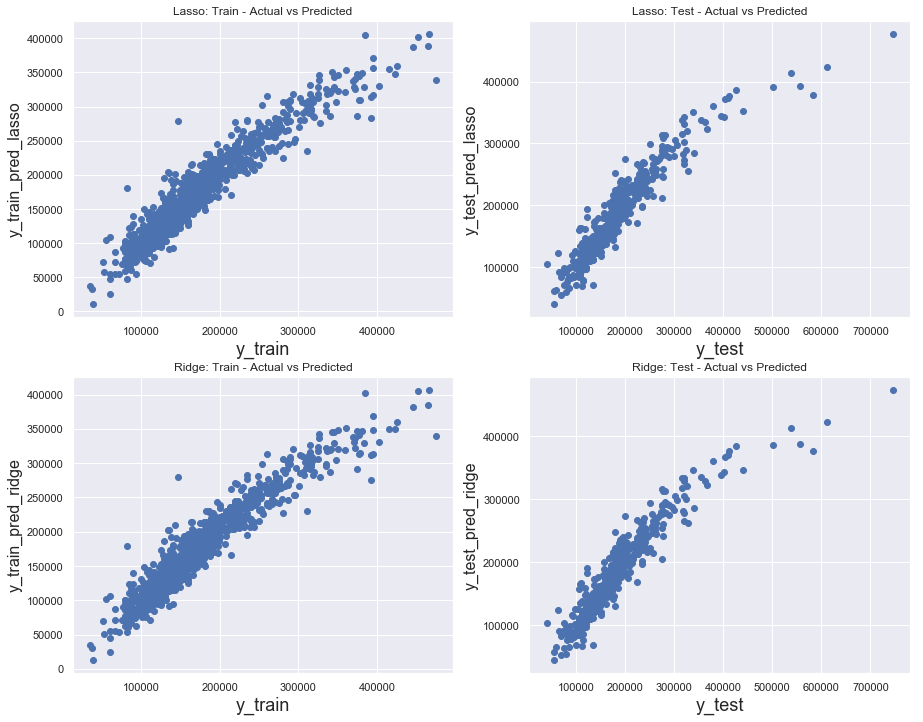

In [1337]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plt.title('Lasso: Train - Actual vs Predicted')
plt.scatter(y_train,y_train_pred_lasso)
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred_lasso', fontsize=16)   

plt.subplot(2, 2, 2)
plt.title('Lasso: Test - Actual vs Predicted')
plt.scatter(y_test,y_test_pred_lasso)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred_lasso', fontsize=16)   

plt.subplot(2, 2, 3)
plt.title('Ridge: Train - Actual vs Predicted')
plt.scatter(y_train,y_train_pred_ridge)
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred_ridge', fontsize=16)   

plt.subplot(2, 2, 4)
plt.title('Ridge: Test - Actual vs Predicted')
plt.scatter(y_test,y_test_pred_ridge)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred_ridge', fontsize=16)   

### <font color = blue> Plot the Training & Test Actual vs Predicted for Linear Regression model </font>

Text(0, 0.5, 'y_test_pred')

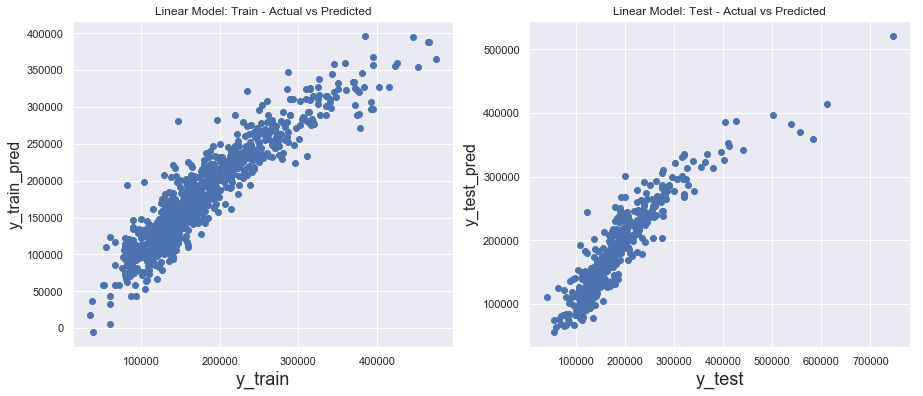

In [1338]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Linear Model: Train - Actual vs Predicted')
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)   

plt.subplot(1, 2, 2)
plt.title('Linear Model: Test - Actual vs Predicted')
plt.scatter(y_test,y_test_predict)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

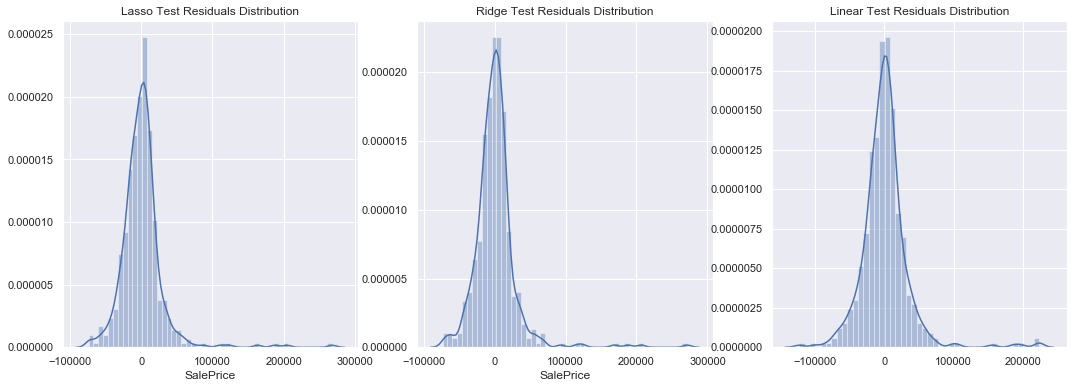

In [1339]:
# Plot the residual distribution of all models
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.title("Lasso Test Residuals Distribution")
res_test_lasso = y_test - y_test_pred_lasso
sns.distplot(res_test_lasso)

plt.subplot(1, 3, 2)
plt.title("Ridge Test Residuals Distribution")
res_test_ridge = y_test - y_test_pred_ridge
sns.distplot(res_test_ridge)

plt.subplot(1, 3, 3)
plt.title("Linear Test Residuals Distribution")
res_test_linear = y_test - y_test_predict
sns.distplot(res_test_linear)

## <font color = blue> Conclusion: From the r2 Scores and the predicted value plots, we can observe that Lasso Regression model is as efficient as Ridge Regression model, with less than half the attributes (78 in Lasso vs. 159 in Ridge). This makes the business requirement easier, as we will be able to achieve best prediction with least possible variables without impacting the practical considerations. Here for this particular data set we have observed it is predicting effectively without being too much resource-intensive. So we can choose best variables from Lasso model. </font>

### <font color = blue>Lasso Parameters: Get the list of coefficients</font>

In [1340]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 141283.957),
 ('LotFrontage', 1496.027),
 ('OverallQual', 17483.221),
 ('MasVnrArea', 3877.063),
 ('BsmtFinSF1', 9534.662),
 ('TotalBsmtSF', 3175.291),
 ('GrLivArea', 24514.092),
 ('FullBath', -786.671),
 ('Fireplaces', 3151.199),
 ('GarageCars', 6419.846),
 ('WoodDeckSF', 2590.565),
 ('OpenPorchSF', 2560.12),
 ('AgeAtSale', -4488.248),
 ('RemodAgeAtSale', -4824.493),
 ('HeatingQC_Ord', 517.367),
 ('FireplaceQu_Ord', -264.959),
 ('BsmtQual_Ord', -183.301),
 ('BsmtExposure_Ord', 6098.023),
 ('CentralAir_Bool', -0.0),
 ('GarageFinish_Ord', 1060.377),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 1129.246),
 ('MSZoning_RM', -5767.327),
 ('LotShape_IR1', -0.0),
 ('LotShape_IR2', 8010.301),
 ('LotShape_Reg', -835.469),
 ('LandContour_Bnk', -102.211),
 ('LandContour_HLS', 3325.059),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_Corner', -766.712),
 ('LotConfig_CulDSac', 4311.298),
 ('LotConfig_FR2', -1108.187),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Gtl', -0.0),
 

In [1341]:
# Lasso Coefficient Dataframe
lasso_coef_df=pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef_df.columns=['Feature_Name','Coef_Value']

lasso_coef_df

,Feature_Name,Coef_Value
0,constant,141283.957
1,LotFrontage,1496.027
2,OverallQual,17483.221
3,MasVnrArea,3877.063
4,BsmtFinSF1,9534.662
5,TotalBsmtSF,3175.291
6,GrLivArea,24514.092
7,FullBath,-786.671
8,Fireplaces,3151.199
9,GarageCars,6419.846


In [1342]:
lasso_coef_df.shape

(160, 2)

In [1343]:
#Fetch Positive Feature Coefficients
lasso_coef_df.loc[lasso_coef_df['Coef_Value'] > 0].sort_values(by='Coef_Value',ascending=False).head(17)

,Feature_Name,Coef_Value
0,constant,141283.957
6,GrLivArea,24514.092
138,SaleType_New,23804.598
57,Neighborhood_StoneBr,23371.581
51,Neighborhood_NridgHt,21355.928
41,Neighborhood_Crawfor,20731.086
68,BldgType_1Fam,18257.345
2,OverallQual,17483.221
87,Exterior1st_BrkFace,15927.014
50,Neighborhood_NoRidge,13080.219


In [1344]:
#Fetch Negative Feature Coefficients
lasso_coef_df.loc[lasso_coef_df['Coef_Value'] < 0].sort_values(by='Coef_Value',ascending=True).head(14)

,Feature_Name,Coef_Value
65,Condition1_RRAe,-9932.888
43,Neighborhood_Gilbert,-8641.058
49,Neighborhood_NWAmes,-8607.375
126,GarageType_Basment,-8569.024
107,Exterior2nd_Plywood,-7030.450
112,Exterior2nd_Wd Shng,-6907.638
46,Neighborhood_Mitchel,-6546.490
23,MSZoning_RM,-5767.327
42,Neighborhood_Edwards,-5700.779
53,Neighborhood_SWISU,-5502.899


# <font color=Blue> Top Positive Features impacting the house price </font>

### <font color = Green> GrLivArea: Above ground Living Area, more area - higher the price
### <font color = Green> SaleType_New: Home just constructed and sold
### <font color = Green> Neighborhood_StoneBr: Stone Brook neighborhood in Ames city
### <font color = Green> Neighborhood_NridgHt: Northridge Heights neighborhood in Ames city
### <font color = Green> Neighborhood_Crawfor: Crawford neighborhood in Ames city
### <font color = Green> BldgType_1Fam: Building type of Single Family Detached
### <font color = Green> OverallQual: Overall quality of the house construction, the better higher the price
### <font color = Green> Exterior1st_BrkFace: Exterior covering being a Brick Face
### <font color = Green> Neighborhood_NoRidge: NorthRidge neighborhood in Ames city
### <font color = Green> Exterior2nd_CmentBd: Second exterior covering being cement board
### <font color = Green> BsmtFinSF1: Higher Basement Type1 Finished area
### <font color = Green> LotShape_IR2: Lot shape being IR2
### <font color = Green> SaleCondition_Normal: Normal Sold house
### <font color = Green> HouseStyle_1Story: One storey building
### <font color = Green> Neighborhood_BrkSide: Brookside neighborhood in Ames city
### <font color = Green> GarageCars: Higher the no. of car capacity in garage, higher the price

# <font color=Blue> Top Negative Features impacting the house price </font>

### <font color = Red> Condition1_RRAe: Adjacent to East-West Railroad 
### <font color = Red> Neighborhood_Gilbert: Gilbert neighborhood in Ames city
### <font color = Red> Neighborhood_NWAmes:  Northwest Ames neighborhood in Ames city
### <font color = Red> GarageType_Basment: Basement Garage
### <font color = Red> Exterior2nd_Plywood: Second Exterior covering on house being Plywood
### <font color = Red> Exterior2nd_Wd Shng: Second Exterior covering on house being Wood Shingles
### <font color = Red> Neighborhood_Mitchel: Mitchell neighborhood in Ames city
### <font color = Red> MSZoning_RM: Zoning class of Sale being Residential Medium Density
### <font color = Red> Neighborhood_Edwards: Edwards neighborhood in Ames city
### <font color = Red> Neighborhood_SWISU: South & West of Iowa State University neighborhood in Ames city
### <font color = Red> Neighborhood_CollgCr: College Creek neighborhood in Ames city